In [65]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [67]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 예시: 맑은 고딕으로 설정 (Windows 환경 시)
plt.rcParams['axes.unicode_minus'] = False

In [13]:
data = pd.read_csv("C:/semi_project/health_checkup/JDM/선택컬럼_건강데이터.csv") # 당뇨 치료

In [66]:
data = pd.read_csv("C:/semi_project/health_checkup/JDM/2022년~2023년/건강데이터_2022_2023_합본.csv")

EDA

In [4]:
data.head()

,ID,year,region,town_t,sex,age,incm,ho_incm,edu,occp,cfam,genertn,D_1_1,DI1_dg,DI1_ag,DI1_pr,DI1_pt,DI1_2,DI2_dg,DI2_ag,DI2_pr,DI2_pt,DI2_2,DE1_dg,DE1_ag,DE1_pr,DE1_pt,DE1_3,DE1_31,DE1_32,DE1_33,DE1_34,DE1_4,DN1_dg,DN1_ag,BH1,BO1,BO1_1,BO2_1,BD1,BD1_11,BD2_1,BP16_1,BP16_2,BP1,BP5,BS1_1,BS3_1,BS3_2,BS12_37,BS12_47,BS12_47_1,BS12_1,BS12_2,BE3_31,BE3_32,BE3_33,BE5_1,BE9,HE_fh,HE_HPfh1,HE_HPfh2,HE_HLfh1,HE_HLfh2,HE_DMfh1,HE_DMfh2,HE_sbp1,HE_dbp1,HE_sbp2,HE_dbp2,HE_HP,HE_ht,HE_wt,HE_wc,HE_BMI,HE_obe,HE_glu,HE_HbA1c,HE_DM_HbA1c,HE_chol,HE_HDL_st2,HE_TG,HE_LDL_drct,HE_HCHOL,HE_HTG,HE_ast,HE_alt,HE_BUN,HE_crea,HE_Upro,HE_Ucrea,HE_Ualb,L_BR_FQ,L_LN_FQ,L_DN_FQ,L_OUT_FQ,LS_VEG1,LS_FRUIT
0,YA01220302,2022.0,1.0,1.0,2.0,56.0,3.0,4.0,3.0,7.0,4.0,4.0,3.0,1.0,48.0,1.0,1.0,1.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,1.0,4.0,1.0,1.0,2.0,1.0,8.0,8.0,10.0,2.0,8.0,3.0,8.0,888.0,2.0,8.0,888.0,2.0,8.0,5.0,1.0,30.0,1.0,88.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,135.0,90.0,138.0,89.0,4.0,151.2,60.6,84.3,26.507517,4.0,94.0,5.6,1.0,199.0,56.0,181.0,122.0,0.0,0.0,22.0,16.0,13.0,0.61,0.0,84.6,9.7,3.0,1.0,1.0,5.0,2.0,2.0
1,YA01220303,2022.0,1.0,1.0,1.0,30.0,3.0,4.0,4.0,3.0,4.0,4.0,2.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,1.0,4.0,3.0,1.0,2.0,3.0,2.0,7.0,7.0,3.0,8.0,3.0,8.0,888.0,2.0,8.0,888.0,2.0,8.0,8.0,3.0,0.0,6.0,88.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,145.0,77.0,128.0,78.0,3.0,174.1,82.3,86.2,27.152029,4.0,84.0,5.3,1.0,122.0,48.0,63.0,63.0,0.0,0.0,28.0,18.0,14.0,0.86,0.0,54.3,NaN,1.0,1.0,1.0,4.0,2.0,3.0
2,YA01220304,2022.0,1.0,1.0,2.0,25.0,3.0,4.0,4.0,7.0,4.0,4.0,2.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,2.0,4.0,2.0,1.0,2.0,4.0,1.0,6.0,8.0,2.0,8.0,3.0,8.0,888.0,2.0,8.0,888.0,2.0,8.0,8.0,0.0,20.0,6.0,88.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,103.0,64.0,104.0,63.0,1.0,166.4,59.0,69.4,21.308131,2.0,87.0,5.0,1.0,202.0,75.0,53.0,124.0,0.0,NaN,17.0,15.0,8.0,0.60,0.0,192.4,9.4,4.0,1.0,2.0,3.0,2.0,2.0
3,YA01236501,2022.0,1.0,1.0,1.0,66.0,3.0,3.0,4.0,7.0,2.0,2.0,2.0,0.0,888.0,8.0,8.0,8.0,1.0,56.0,1.0,1.0,1.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,1.0,3.0,1.0,2.0,2.0,3.0,2.0,9.0,9.0,4.0,8.0,2.0,3.0,888.0,2.0,8.0,888.0,2.0,8.0,8.0,1.0,30.0,1.0,88.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,116.0,80.0,120.0,78.0,2.0,168.7,67.1,83.5,23.577207,3.0,87.0,5.2,1.0,136.0,47.0,123.0,74.0,1.0,0.0,20.0,15.0,18.0,0.90,0.0,99.1,NaN,1.0,1.0,1.0,4.0,1.0,2.0
4,YA01236502,2022.0,1.0,1.0,2.0,62.0,3.0,3.0,3.0,6.0,2.0,2.0,2.0,0.0,888.0,8.0,8.0,8.0,1.0,53.0,1.0,1.0,1.0,0.0,888.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,888.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,7.0,9.0,3.0,8.0,3.0,8.0,888.0,2.0,8.0,888.0,2.0,8.0,8.0,1.0,0.0,4.0,88.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,145.0,89.0,131.0,87.0,3.0,157.1,53.9,77.5,21.839183,2.0,91.0,5.6,1.0,149.0,53.0,110.0,82.0,1.0,0.0,26.0,23.0,10.0,0.67,0.0,46.5,3.3,1.0,1.0,1.0,6.0,1.0,2.0


In [5]:
data.shape

(13194, 98)

- **BP1** : 평소 스트레스 인지 정도  
- **BD1_11** : 1년간 음주빈도  
- **BS3_2** : 하루평균 일반담배(궐련) 흡연량  
- **BE5_1** : 1주일간 운동 회수  

In [54]:
import pandas as pd

# 남기고 싶은 컬럼 리스트
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'L_OUT_FQ', 
    'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg'
]

# 원래 데이터프레임이 df일 때
data = data[columns_to_keep]


컬럼 **98개 중 31개**만 추출

In [22]:
data.shape

(13194, 32)

데이터 프레임 한글로 출력

In [44]:
column_mapping = {
    'ID': 'ID',
    'year': '조사연도',
    'age': '연령',
    'sex': '성별',
    'HE_ht': '신장(cm)',
    'HE_wt': '체중(kg)',
    'HE_wc': '허리둘레(cm)',
    'HE_BMI': '체질량지수(BMI)',
    'HE_sbp1': '수축기 혈압',
    'HE_dbp1': '이완기 혈압',
    'HE_Upro': '소변 단백',
    'HE_glu': '공복혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤',
    'HE_TG': '중성지방',
    'HE_LDL_drct': 'LDL 콜레스테롤',
    'HE_crea': '크레아티닌',
    'HE_ast': 'AST (간기능)',
    'HE_alt': 'ALT (간기능)',
    'L_OUT_FQ': '최근 1년 외식 빈도',
    'BP1': '1년간 음주 빈도',
    'BD1_11': '하루 평균 담배 흡연량',
    'BS3_2': '1주일간 운동 횟수',
    'BE5_1': '스트레스 인지 정도',
    'HE_obe': '비만 여부',
    'HE_HP': '고혈압 여부',
    'DI1_dg': '고혈압 의사진단 여부',
    'HE_DM_HbA1c': '당뇨 여부 (HbA1c)',
    'DE1_dg': '당뇨병 의사진단 여부'
}

# 1. 영어 컬럼 순서 (원하는 순서)
original_columns = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1','HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
     'L_OUT_FQ',
    'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'DI1_dg', 'HE_DM_HbA1c','DE1_dg'
]

# 2. 한글 매핑된 컬럼 리스트 만들기
kor_columns = [column_mapping[col] for col in original_columns]

# 3. 컬럼명 한글로 바꾸기
data = data.rename(columns=column_mapping)

# 4. 원하는 순서로 재정렬
data = data[kor_columns]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             13194 non-null  object 
 1   조사연도           13194 non-null  float64
 2   연령             13194 non-null  float64
 3   성별             13194 non-null  float64
 4   신장(cm)         12964 non-null  float64
 5   체중(kg)         13104 non-null  float64
 6   허리둘레(cm)       12285 non-null  float64
 7   체질량지수(BMI)     12959 non-null  float64
 8   수축기 혈압         12490 non-null  float64
 9   이완기 혈압         12490 non-null  float64
 10  소변 단백          11828 non-null  float64
 11  공복혈당           11744 non-null  float64
 12  총 콜레스테롤        11744 non-null  float64
 13  HDL 콜레스테롤      11744 non-null  float64
 14  중성지방           11744 non-null  float64
 15  LDL 콜레스테롤      11744 non-null  float64
 16  크레아티닌          11744 non-null  float64
 17  AST (간기능)      11743 non-null  float64
 18  ALT (간

In [34]:
data.describe()

,조사연도,연령,성별,신장(cm),체중(kg),허리둘레(cm),체질량지수(BMI),수축기 혈압,이완기 혈압,소변 단백,공복혈당,총 콜레스테롤,HDL 콜레스테롤,중성지방,LDL 콜레스테롤,크레아티닌,AST (간기능),ALT (간기능),최근 1년 외식 빈도,1년간 음주 빈도,하루 평균 담배 흡연량,1주일간 운동 횟수,스트레스 인지 정도,비만 여부,고혈압 여부,고혈압 의사진단 여부,당뇨 여부 (HbA1c),당뇨병 의사진단 여부
count,13194.000000,13194.000000,13194.000000,12964.000000,13104.000000,12285.000000,12959.000000,12490.000000,12490.000000,11828.000000,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000,11744.000000,11743.000000,11719.000000,12629.000000,13185.000000,13185.000000,13185.000000,13185.000000,10977.000000,11009.000000,13185.000000,10511.000000,13185.000000
mean,2022.525163,47.122177,1.553964,159.769091,60.824657,81.966854,23.296455,120.531305,73.915132,0.192002,100.483566,184.564118,57.135473,123.888709,111.774183,0.788002,22.671804,21.562505,4.157970,3.468032,4.326735,776.664088,3.016610,2.972943,2.398401,1.432461,1.625059,1.293364
std,0.499385,22.177893,0.497098,15.949337,16.858421,12.313630,4.202148,17.085942,10.542230,0.505567,22.492904,40.124506,15.271038,93.952699,36.247556,0.238124,15.129282,21.365243,1.709683,1.783588,2.550736,294.616132,2.864578,1.071470,1.340767,2.776135,0.733808,2.819043
min,2022.000000,1.000000,1.000000,73.300000,8.500000,43.400000,11.894753,72.000000,31.000000,0.000000,47.000000,70.000000,6.000000,18.000000,10.000000,0.330000,8.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,2022.000000,30.000000,1.000000,154.700000,52.200000,73.700000,20.594094,108.000000,66.000000,0.000000,89.000000,156.000000,46.000000,73.000000,86.000000,0.650000,17.000000,12.000000,3.000000,3.000000,2.000000,888.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,2023.000000,51.000000,2.000000,161.800000,60.900000,82.500000,23.195867,118.000000,73.000000,0.000000,95.000000,183.000000,55.000000,101.000000,109.000000,0.750000,20.000000,17.000000,4.000000,3.000000,4.000000,888.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000
75%,2023.000000,65.000000,2.000000,169.200000,70.700000,90.200000,25.764555,130.000000,80.000000,0.000000,104.000000,210.000000,66.000000,146.000000,136.000000,0.900000,25.000000,24.000000,6.000000,4.000000,6.000000,888.000000,5.000000,4.000000,4.000000,1.000000,2.000000,1.000000
max,2023.000000,80.000000,2.000000,193.000000,141.800000,132.700000,47.956734,243.000000,152.000000,5.000000,460.000000,489.000000,142.000000,3367.000000,394.000000,10.190000,722.000000,861.000000,7.000000,9.000000,9.000000,999.000000,9.000000,6.000000,4.000000,9.000000,3.000000,9.000000


데이터 **통계** 확인

In [46]:
# 3️⃣ EDA 요약 (결측치, 통계값, 이상치)


# 이상치 비율 계산 함수
def detect_outlier_ratio(series):
    if series.dtype.kind in 'biufc':
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_ratio = ((series < lower) | (series > upper)).mean() * 100
        return outlier_ratio
    else:
        return np.nan
    
eda = pd.DataFrame(index=data.columns)
eda['고유값 개수'] = data.nunique()
eda['결측치 비율 (%)'] = data.isnull().mean() * 100
eda['이상치 비율 (%)'] = data.apply(detect_outlier_ratio)
eda['최소값'] = data.min(numeric_only=True)
eda['최대값'] = data.max(numeric_only=True)
eda['평균'] = data.mean(numeric_only=True)
eda['표준편차'] = data.std(numeric_only=True)

eda

,고유값 개수,결측치 비율 (%),이상치 비율 (%),최소값,최대값,평균,표준편차
ID,13194,0.000000,NaN,NaN,NaN,NaN,NaN
조사연도,2,0.000000,0.000000,2022.000000,2023.000000,2022.525163,0.499385
연령,80,0.000000,0.000000,1.000000,80.000000,47.122177,22.177893
성별,2,0.000000,0.000000,1.000000,2.000000,1.553964,0.497098
신장(cm),957,1.743217,5.676823,73.300000,193.000000,159.769091,15.949337
체중(kg),1008,0.682128,5.775352,8.500000,141.800000,60.824657,16.858421
허리둘레(cm),712,6.889495,0.788237,43.400000,132.700000,81.966854,12.313630
체질량지수(BMI),12302,1.781113,1.750796,11.894753,47.956734,23.296455,4.202148
수축기 혈압,127,5.335759,2.144914,72.000000,243.000000,120.531305,17.085942
이완기 혈압,88,5.335759,1.083826,31.000000,152.000000,73.915132,10.542230


**이상치 확인**
- 체중, 신장

In [49]:
set(sorted(data["HE_ht"]))

{178.3,
 178.8,
 130.9,
 nan,
 nan,
 nan,
 134.6,
 nan,
 179.3,
 179.8,
 nan,
 nan,
 nan,
 131.4,
 nan,
 nan,
 nan,
 nan,
 180.3,
 nan,
 180.8,
 nan,
 nan,
 nan,
 73.3,
 74.9,
 75.5,
 76.5,
 77.3,
 78.2,
 78.0,
 79.8,
 76.6,
 181.8,
 83.6,
 84.0,
 84.4,
 85.0,
 86.5,
 86.7,
 89.9,
 89.4,
 90.9,
 92.2,
 92.6,
 91.0,
 92.1,
 94.0,
 94.1,
 94.3,
 95.3,
 96.6,
 97.2,
 102.2,
 103.1,
 104.1,
 102.4,
 106.5,
 107.4,
 108.9,
 102.6,
 110.3,
 102.9,
 112.2,
 113.9,
 110.8,
 115.6,
 115.9,
 116.6,
 117.2,
 111.1,
 111.6,
 112.3,
 122.6,
 116.7,
 116.8,
 119.2,
 121.1,
 121.6,
 123.9,
 123.3,
 125.1,
 124.3,
 124.8,
 124.6,
 126.4,
 126.0,
 127.4,
 128.1,
 129.6,
 132.2,
 133.3,
 137.2,
 138.1,
 142.0,
 143.0,
 144.2,
 145.4,
 146.0,
 147.0,
 148.0,
 150.9,
 151.9,
 152.9,
 150.7,
 149.0,
 155.9,
 156.6,
 157.6,
 158.8,
 159.9,
 159.8,
 161.9,
 155.6,
 163.5,
 163.6,
 161.8,
 160.8,
 158.6,
 159.6,
 162.0,
 163.0,
 162.6,
 163.1,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 170.0,
 171.0,
 1

In [50]:
set(sorted(data["HE_wt"]))

{8.7,
 9.1,
 10.6,
 11.1,
 10.9,
 13.4,
 13.7,
 13.8,
 9.7,
 11.4,
 11.7,
 12.0,
 12.2,
 12.4,
 13.3,
 14.2,
 15.3,
 16.2,
 26.6,
 26.7,
 27.2,
 20.0,
 21.0,
 22.0,
 23.0,
 24.2,
 25.0,
 26.3,
 27.0,
 28.6,
 29.7,
 30.0,
 31.4,
 32.2,
 33.3,
 34.0,
 35.4,
 36.2,
 37.4,
 38.3,
 39.0,
 49.9,
 41.3,
 42.1,
 43.0,
 53.6,
 45.0,
 55.7,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 61.5,
 12.5,
 54.0,
 55.0,
 58.0,
 59.0,
 60.0,
 61.0,
 60.8,
 61.8,
 14.5,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 16.5,
 73.0,
 74.0,
 75.0,
 76.0,
 17.5,
 78.0,
 79.1,
 80.1,
 81.0,
 82.0,
 83.1,
 84.1,
 85.3,
 86.0,
 87.2,
 88.0,
 89.1,
 90.2,
 91.4,
 92.1,
 93.0,
 94.6,
 95.5,
 96.6,
 21.5,
 98.1,
 99.1,
 100.4,
 101.5,
 22.5,
 nan,
 111.2,
 114.1,
 114.0,
 107.6,
 109.9,
 110.4,
 119.0,
 111.0,
 24.5,
 24.0,
 114.3,
 115.4,
 117.4,
 25.5,
 118.2,
 121.6,
 129.3,
 122.2,
 26.0,
 124.0,
 127.1,
 129.2,
 nan,
 136.8,
 135.3,
 137.0,
 132.7,
 26.5,
 28.0,
 27.5,
 141.8,
 29.5,
 29.0,
 nan,
 nan,
 3

In [56]:
data

,ID,year,age,sex,HE_ht,HE_wt,HE_wc,HE_BMI,HE_sbp1,HE_dbp1,HE_Upro,HE_glu,HE_chol,HE_HDL_st2,HE_TG,HE_LDL_drct,HE_crea,HE_ast,HE_alt,L_OUT_FQ,BP1,BD1_11,BS3_2,BE5_1,HE_obe,HE_HP,HE_DM_HbA1c,DE1_dg,DI1_dg
0,YA01220302,2022.0,56.0,2.0,151.2,60.6,84.3,26.507517,135.0,90.0,0.0,94.0,199.0,56.0,181.0,122.0,0.61,22.0,16.0,5.0,2.0,1.0,888.0,1.0,4.0,4.0,1.0,0.0,1.0
1,YA01220303,2022.0,30.0,1.0,174.1,82.3,86.2,27.152029,145.0,77.0,0.0,84.0,122.0,48.0,63.0,63.0,0.86,28.0,18.0,4.0,3.0,3.0,888.0,6.0,4.0,3.0,1.0,0.0,0.0
2,YA01220304,2022.0,25.0,2.0,166.4,59.0,69.4,21.308131,103.0,64.0,0.0,87.0,202.0,75.0,53.0,124.0,0.60,17.0,15.0,3.0,2.0,4.0,888.0,6.0,2.0,1.0,1.0,0.0,0.0
3,YA01236501,2022.0,66.0,1.0,168.7,67.1,83.5,23.577207,116.0,80.0,0.0,87.0,136.0,47.0,123.0,74.0,0.90,20.0,15.0,4.0,4.0,3.0,888.0,1.0,3.0,2.0,1.0,0.0,0.0
4,YA01236502,2022.0,62.0,2.0,157.1,53.9,77.5,21.839183,145.0,89.0,0.0,91.0,149.0,53.0,110.0,82.0,0.67,26.0,23.0,6.0,3.0,2.0,888.0,4.0,2.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,YR62368101,2023.0,80.0,1.0,162.4,63.3,97.0,24.001128,117.0,68.0,0.0,101.0,193.0,38.0,188.0,124.0,1.44,18.0,12.0,5.0,3.0,3.0,888.0,1.0,3.0,4.0,3.0,1.0,1.0
13190,YR62368102,2023.0,78.0,2.0,157.3,71.7,97.0,28.977553,136.0,82.0,0.0,104.0,223.0,71.0,110.0,150.0,0.68,17.0,13.0,5.0,3.0,2.0,888.0,5.0,4.0,4.0,2.0,0.0,1.0
13191,YR62370201,2023.0,61.0,2.0,145.1,40.2,66.3,19.093750,127.0,81.0,0.0,90.0,178.0,46.0,91.0,123.0,0.60,18.0,11.0,6.0,3.0,3.0,888.0,1.0,2.0,3.0,2.0,0.0,0.0
13192,YR62394401,2023.0,57.0,1.0,172.8,74.4,87.6,24.916409,142.0,87.0,0.0,111.0,261.0,36.0,167.0,201.0,1.03,22.0,19.0,2.0,3.0,3.0,888.0,6.0,3.0,3.0,2.0,0.0,0.0


이상치 확인
- **비율 5% 이상 컬럼들**

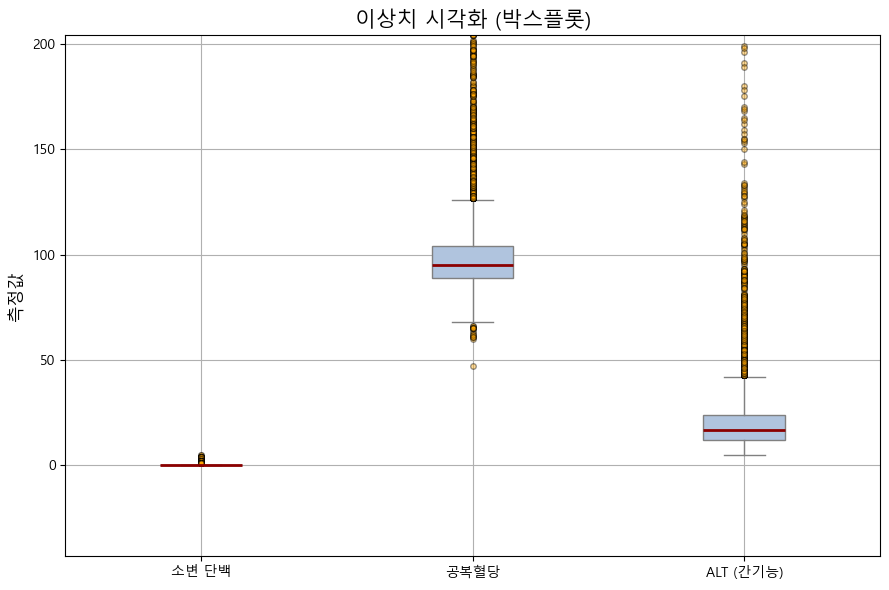

In [60]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 사용자 기준, 필요시 주석 해제)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 시각화용 데이터 준비
columns_to_plot = ['HE_Upro', 'HE_glu', 'HE_alt']
column_labels = {
    'HE_Upro': '소변 단백',
    'HE_glu': '공복혈당',
    'HE_alt': 'ALT (간기능)'
}
data_boxplot = data[columns_to_plot].copy()
data_boxplot.columns = [column_labels[col] for col in columns_to_plot]

# 박스플롯
plt.figure(figsize=(9, 6))
box = data_boxplot.boxplot(
    grid=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightsteelblue', color='gray'),
    medianprops=dict(color='darkred', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, alpha=0.4),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray')
)

# 제목 및 라벨
plt.title('이상치 시각화 (박스플롯)', fontsize=15)
plt.ylabel('측정값', fontsize=12)

# Y축 상한 설정 (너무 높은 이상치가 시야 가리는 경우)
plt.ylim(top=data_boxplot.quantile(0.95).max() * 1.5)

plt.tight_layout()
plt.show()


**타겟 변수** 분포 확인

In [38]:
data['당뇨 여부 (HbA1c)'].value_counts()

당뇨 여부 (HbA1c)
1.0    5539
2.0    3374
3.0    1598
Name: count, dtype: int64

In [39]:
data['비만 여부'].value_counts()

비만 여부
2.0    4106
4.0    3228
3.0    2468
5.0     589
1.0     471
6.0     115
Name: count, dtype: int64

In [40]:
data['고혈압 여부'].value_counts()

고혈압 여부
1.0    4772
4.0    3803
3.0    1552
2.0     882
Name: count, dtype: int64

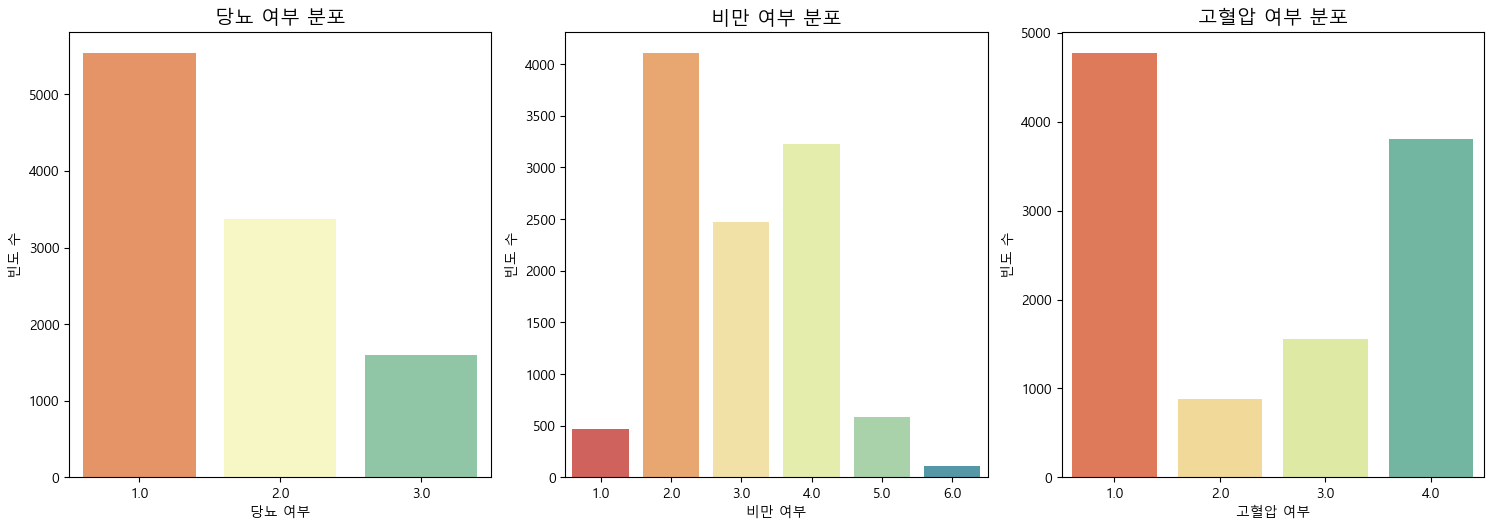

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 변수 리스트
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': '당뇨 여부',
    'HE_obe': '비만 여부',
    'HE_HP': '고혈압 여부'
}

# 서브플롯 설정 (2행 4열: 8개의 칸 중 3개 사용)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2차원 → 1차원 평탄화

# 각 변수에 대해 countplot 그리기
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} 분포", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('빈도 수')

# 사용하지 않는 subplot 숨기기
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [69]:
data = pd.read_csv("C:/semi_project/health_checkup/JDM/2022년~2023년/건강데이터_2022_2023_합본.csv")

In [ ]:
#data = pd.read_csv("C:/semi_project/health_checkup/JDM/선택컬럼_건강데이터.csv") # 당뇨 치료

이상치 처리

In [70]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# 적용
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

결측치 처리

In [71]:
import pandas as pd

# 남기고 싶은 컬럼 리스트
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg'
]

# 원래 데이터프레임이 df일 때
data = data[columns_to_keep]


In [ ]:
# data = data[data['DE1_3'].isin([1, 2])]

In [ ]:
# data = data[data['DI1_pt'].isin([0, 1])]

In [ ]:
# set(data['DE1_3'])

{1.0, 2.0}

In [ ]:
# import pandas as pd
# #당뇨 테스트
# # 남기고 싶은 컬럼 리스트
# columns_to_keep = [
#     'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
#     'HE_sbp1', 'HE_dbp1',
#     'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
#     'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
#     # 'L_OUT_FQ', 
#     # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
#     'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
#     'DE1_dg', 'DI1_dg', 'DE1_3', 'DI1_pt'
# ]

# # 원래 데이터프레임이 df일 때
# data = data[columns_to_keep]


In [ ]:
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # 남은 결측치는 클래스 비율 기반 랜덤 샘플링
    if data['HE_DM_HbA1c'].isnull().any():
        class_probs = data['HE_DM_HbA1c'].value_counts(normalize=True)
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].apply(
            lambda x: np.random.choice(class_probs.index, p=class_probs.values) if pd.isna(x) else x
        )
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMI가 KNN 대체된 경우 표시
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # 남은 결측치는 클래스 비율 기반 랜덤 샘플링
    if data['HE_obe'].isnull().any():
        class_probs = data['HE_obe'].value_counts(normalize=True)
        data['HE_obe'] = data['HE_obe'].apply(
            lambda x: np.random.choice(class_probs.index, p=class_probs.values) if pd.isna(x) else x
        )
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # 남은 결측치는 클래스 비율 기반 랜덤 샘플링
    if data['HE_HP'].isnull().any():
        class_probs = data['HE_HP'].value_counts(normalize=True)
        data['HE_HP'] = data['HE_HP'].apply(
            lambda x: np.random.choice(class_probs.index, p=class_probs.values) if pd.isna(x) else x
        )
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#결측치 비율 낮은 변수 처리
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
 ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # 연속형 변수

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#생체 지표 결측치 처리
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# 스케일링
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# 역스케일링
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data

# knn_scaler_filename = 'HE_DM_HbA1c_knn_scaler.pkl'
# knn_imputer_filename = 'HE_DM_HbA1c_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_obe_knn_scaler.pkl'
# knn_imputer_filename = 'HE_obe_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_HP_knn_scaler.pkl'
# knn_imputer_filename = 'HE_HP_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)

print("결측치 처리 후 데이터 상태:")
print(data.isnull().sum())
print("\n타겟 변수 클래스 비율:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\n기본 통계량:")
print(data.describe())

DE1_dg missing ratio: 0.0
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Mode for DI1_dg: 1.0
Mode for DE1_dg: 1.0
Median for HE_wt: 65.65
Median for HE_ht: 161.64999999999998
Median for HE_BMI: 25.011973327866066
결측치 처리 후 데이터 상태:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
DE1_3             0
DI1_pt            0
HE_BMI_imputed    0
dtype: int64

타겟 변수 클래스 비율:

HE_DM_HbA1c:
HE_DM_HbA1c
3.0    1.0
Name: proportion, dtype: float64

HE_obe:
HE_obe
4.0    0.369427
3.0    0.248408
2.0    0.201699
5.0   

In [74]:
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # 남은 결측치는 클래스 비율 기반 랜덤 샘플링
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMI가 KNN 대체된 경우 표시
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # 남은 결측치는 클래스 비율 기반 랜덤 샘플링
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # 남은 결측치는 클래스 비율 기반 랜덤 샘플링
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#결측치 비율 낮은 변수 처리
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # 연속형 변수

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#생체 지표 결측치 처리
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# 스케일링
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# 역스케일링
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data

# knn_scaler_filename = 'HE_DM_HbA1c_knn_scaler.pkl'
# knn_imputer_filename = 'HE_DM_HbA1c_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_obe_knn_scaler.pkl'
# knn_imputer_filename = 'HE_obe_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_HP_knn_scaler.pkl'
# knn_imputer_filename = 'HE_HP_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)

print("결측치 처리 후 데이터 상태:")
print(data.isnull().sum())
print("\n타겟 변수 클래스 비율:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\n기본 통계량:")
print(data.describe())

DE1_dg missing ratio: 0.0006821282401091405
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.7
Median for HE_ht: 163.0
Median for HE_BMI: 23.744212501361336
결측치 처리 후 데이터 상태:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
HE_BMI_imputed    0
dtype: int64

타겟 변수 클래스 비율:

HE_DM_HbA1c:
HE_DM_HbA1c
1.0    0.546637
2.0    0.300579
3.0    0.152784
Name: proportion, dtype: float64

HE_obe:
HE_obe
2.0    0.367661
4.0    0.287661
3.0    0.220846
5.0    0.052472
1.0    0.041782
6.0    0.029577

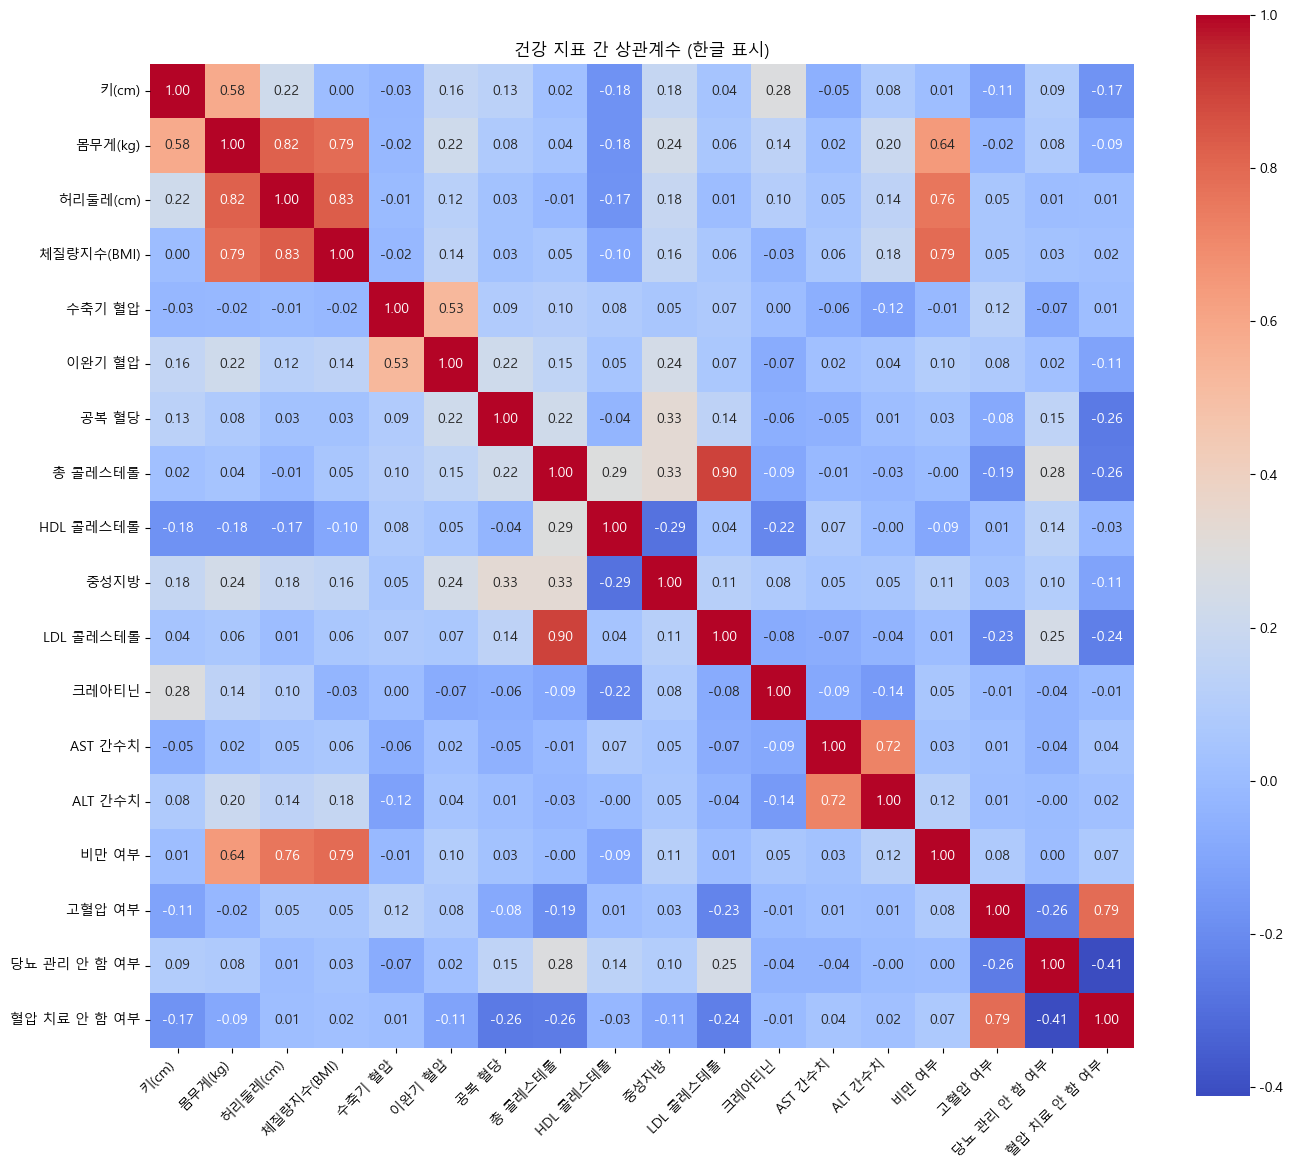

In [ ]:
column_name_map = {
    'HE_ht': '키(cm)',
    'HE_wt': '몸무게(kg)',
    'HE_wc': '허리둘레(cm)',
    'HE_BMI': '체질량지수(BMI)',
    'HE_sbp1': '수축기 혈압',
    'HE_dbp1': '이완기 혈압',
    'HE_glu': '공복 혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤',
    'HE_TG': '중성지방',
    'HE_LDL_drct': 'LDL 콜레스테롤',
    'HE_crea': '크레아티닌',
    'HE_ast': 'AST 간수치',
    'HE_alt': 'ALT 간수치',
    'HE_obe': '비만 여부',
    'HE_HP': '고혈압 여부',
    'DE1_3': '당뇨 관리 안 함 여부',
    'DI1_pt' : '혈압 치료 안 함 여부'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DE1_3', 'DI1_pt'
]

import seaborn as sns
import matplotlib.pyplot as plt

# 보고 싶은 변수만 추출
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# 컬럼명을 한글로 변환
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("건강 지표 간 상관계수 (한글 표시)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**타겟변수와 독립변수의 상관관계 확인**

📊 타겟 변수 상관 분석 - 당뇨병 (HbA1c)


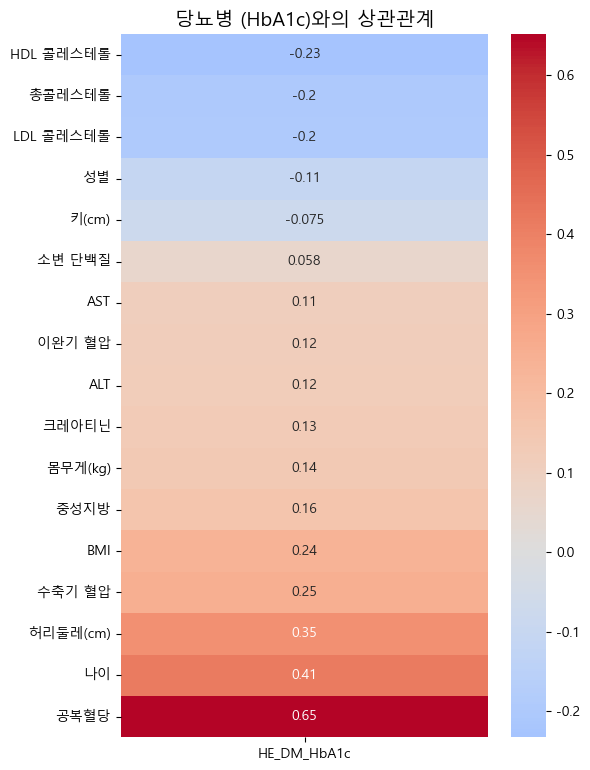

📊 타겟 변수 상관 분석 - 비만도


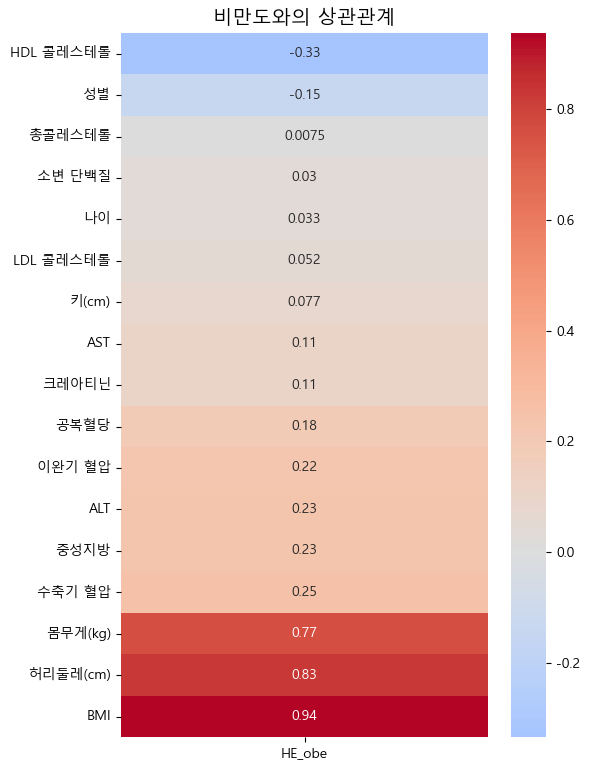

📊 타겟 변수 상관 분석 - 고혈압


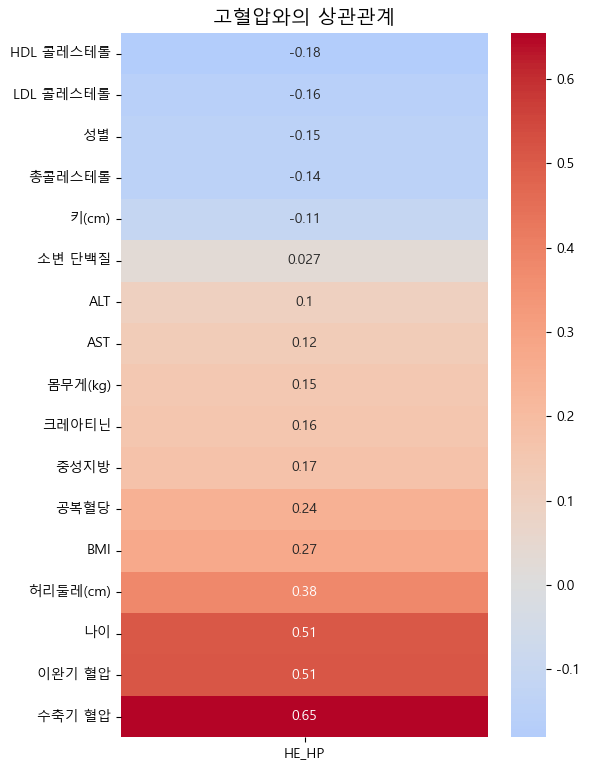

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 이름 -> 한글 매핑 사전
feature_name_ko = {
    'HE_ht': '키(cm)', 'HE_wt': '몸무게(kg)', 'HE_wc': '허리둘레(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': '수축기 혈압', 'HE_dbp1': '이완기 혈압',
    'HE_Upro': '소변 단백질', 'HE_glu': '공복혈당', 'HE_chol': '총콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤', 'HE_TG': '중성지방', 'HE_LDL_drct': 'LDL 콜레스테롤',
    'HE_crea': '크레아티닌', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': '성별', 'age': '나이',
    'BS3_2': '1주일간 운동 횟수',
    'BE5_1': '스트레스 인지 정도',
    'L_OUT_FQ': '외식 빈도'
}

# 타겟 이름 -> 한글 매핑
target_name_ko = {
    'HE_DM_HbA1c': '당뇨병 (HbA1c)',
    'HE_obe': '비만도',
    'HE_HP': '고혈압'
}

# 제외할 컬럼
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features 자동 지정
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"📊 타겟 변수 상관 분석 - {target_name_ko[target]}")
    
    # 수치형 변수만 포함한 데이터프레임
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # 상관계수 계산
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # 한글 라벨로 인덱스 변환
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # 시각화
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}와의 상관관계", fontsize=14)
    plt.tight_layout()
    plt.show()


📊 타겟 변수 상관 분석 - 당뇨병 (HbA1c)


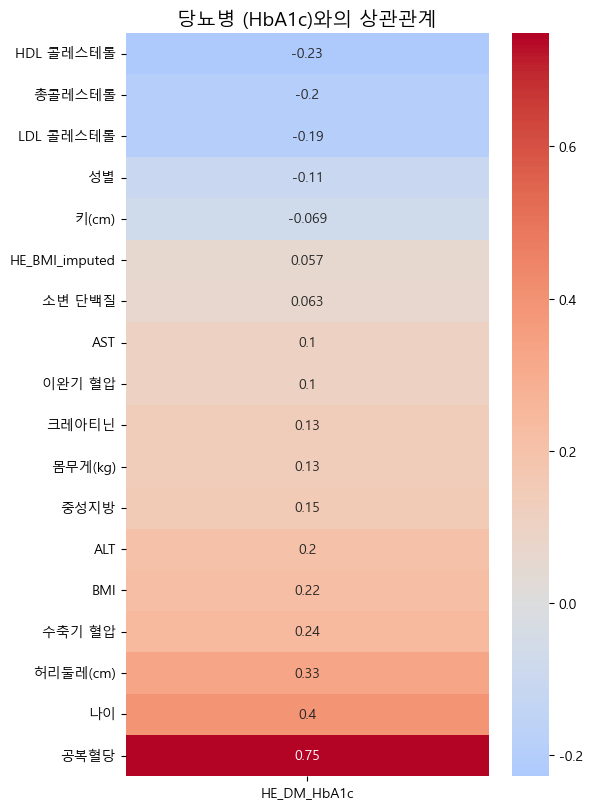

📊 타겟 변수 상관 분석 - 비만도


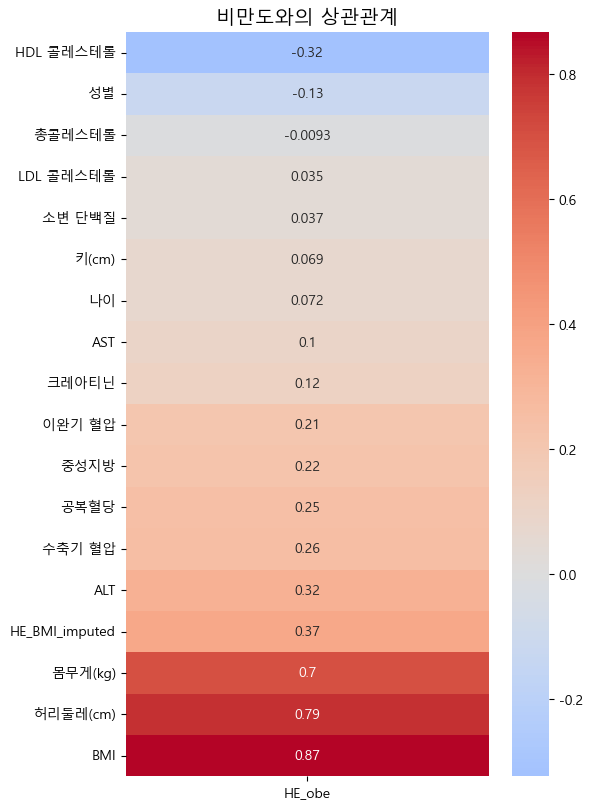

📊 타겟 변수 상관 분석 - 고혈압


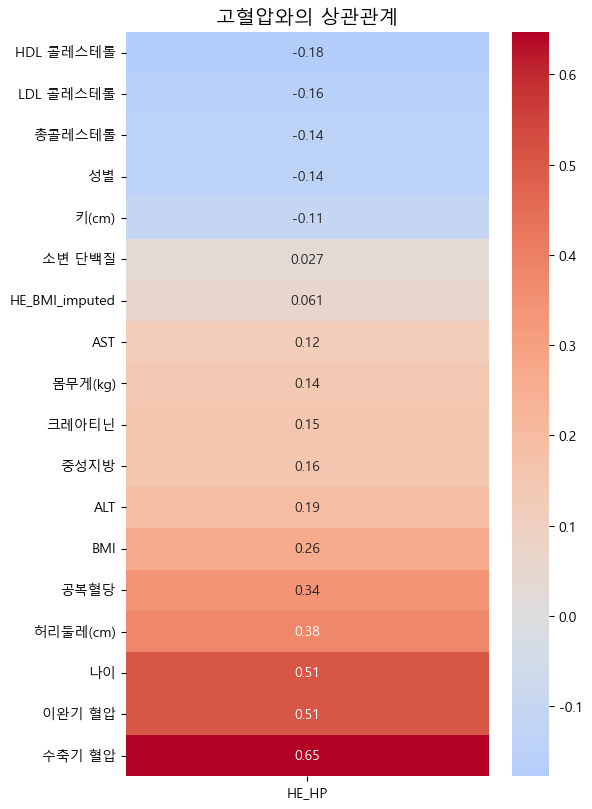

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# 변수 이름 -> 한글 매핑 사전
feature_name_ko = {
    'HE_ht': '키(cm)', 'HE_wt': '몸무게(kg)', 'HE_wc': '허리둘레(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': '수축기 혈압', 'HE_dbp1': '이완기 혈압',
    'HE_Upro': '소변 단백질', 'HE_glu': '공복혈당', 'HE_chol': '총콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤', 'HE_TG': '중성지방', 'HE_LDL_drct': 'LDL 콜레스테롤',
    'HE_crea': '크레아티닌', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': '성별', 'age': '나이',
    'BS3_2': '1주일간 운동 횟수',
    'BE5_1': '스트레스 인지 정도',
    'L_OUT_FQ': '외식 빈도',
    'DE1_3': '당뇨 관리 안 함 여부',
    'DI1_pt' : '혈압 치료 안 함 여부'
}

# 타겟 이름 -> 한글 매핑
target_name_ko = {
    'HE_DM_HbA1c': '당뇨병 (HbA1c)',
    'HE_obe': '비만도',
    'HE_HP': '고혈압'
}

# 제외할 컬럼
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features 자동 지정
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"📊 타겟 변수 상관 분석 - {target_name_ko[target]}")
    
    # 수치형 변수만 포함한 데이터프레임
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # 상관계수 계산
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # 한글 라벨로 인덱스 변환
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # 시각화
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}와의 상관관계", fontsize=14)
    plt.tight_layout()
    plt.show()


In [50]:
# 타입 확인
print(data['HE_DM_HbA1c'].dtype)

# 결측치 확인
print(data['HE_DM_HbA1c'].isna().sum())

float64
0


In [51]:
print(data['HE_DM_HbA1c'].value_counts())

HE_DM_HbA1c
3.0    471
Name: count, dtype: int64


In [58]:
import pandas as pd

# 예: 80세 이상은 80으로 표기되어 있으므로 그대로 사용 가능
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80세 이상 포함
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

In [59]:
group_stats = data.groupby('AGE_GROUP')['HE_DM_HbA1c'].mean().reset_index()

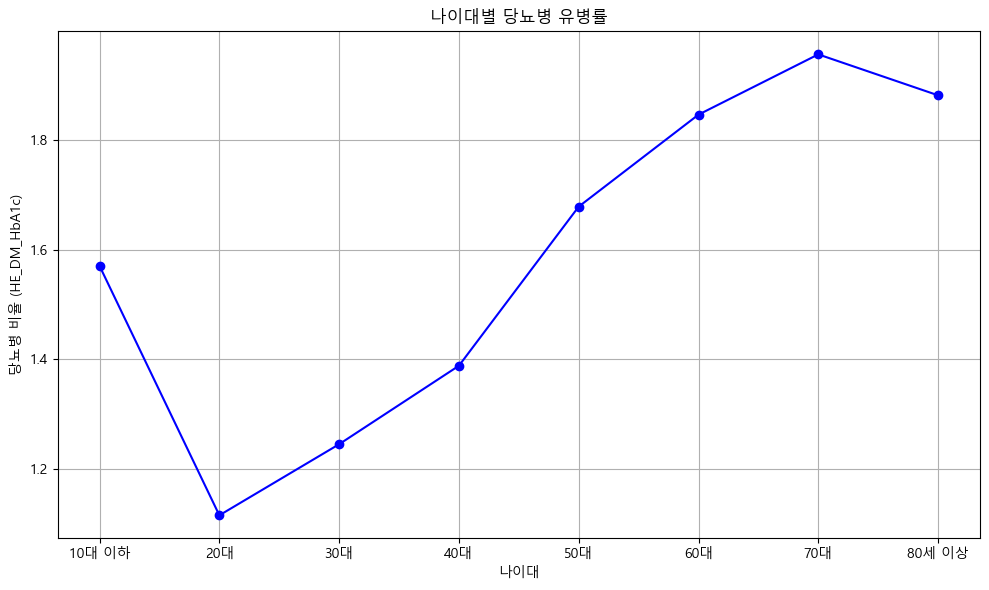

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 나이 그룹 생성 (AGE_GROUP 컬럼 추가)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80세 이상 포함
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. 나이그룹별 당뇨병 평균값(= 유병률) 계산
group_stats = data.groupby('AGE_GROUP')['HE_DM_HbA1c'].mean().reset_index()

# 3. 시각화
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_DM_HbA1c'], marker='o', color='blue')
plt.xlabel('나이대')
plt.ylabel('당뇨병 비율 (HE_DM_HbA1c)')
plt.title('나이대별 당뇨병 유병률')
plt.grid(True)
plt.tight_layout()
plt.show()

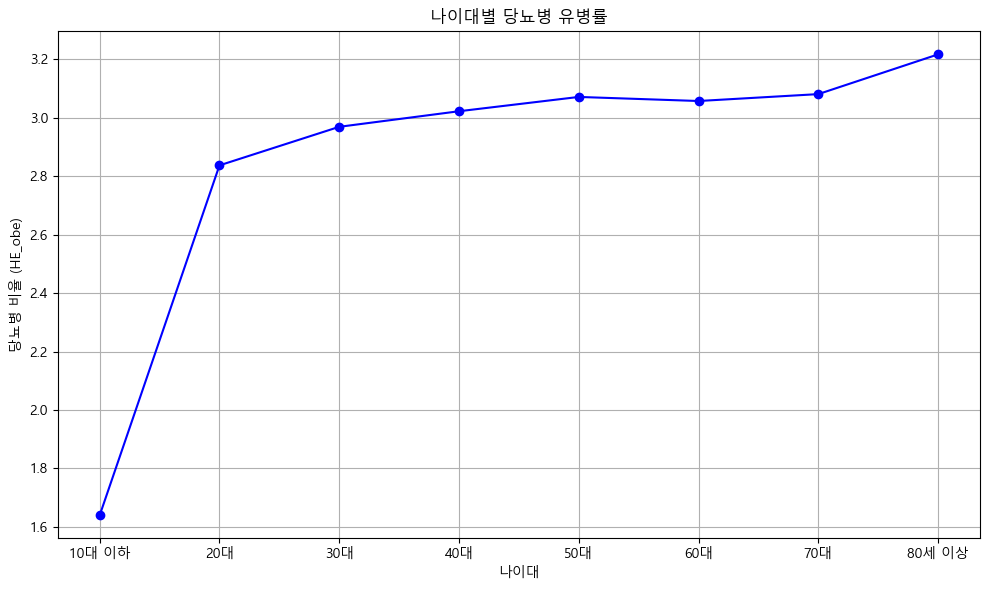

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 나이 그룹 생성 (AGE_GROUP 컬럼 추가)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80세 이상 포함
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. 나이그룹별 당뇨병 평균값(= 유병률) 계산
group_stats = data.groupby('AGE_GROUP')['HE_obe'].mean().reset_index()

# 3. 시각화
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_obe'], marker='o', color='blue')
plt.xlabel('나이대')
plt.ylabel('당뇨병 비율 (HE_obe)')
plt.title('나이대별 당뇨병 유병률')
plt.grid(True)
plt.tight_layout()
plt.show()

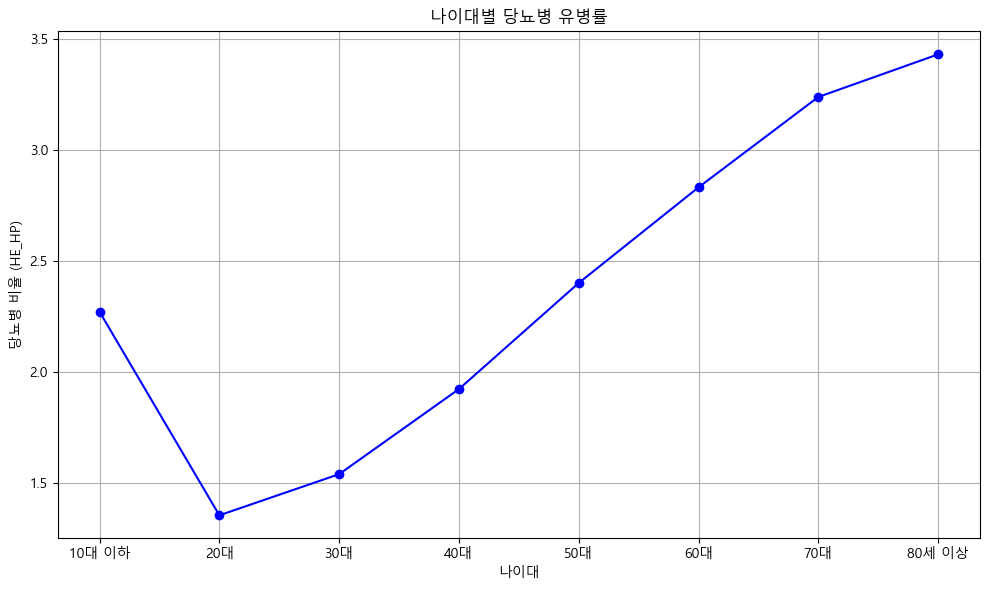

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 나이 그룹 생성 (AGE_GROUP 컬럼 추가)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80세 이상 포함
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대', '80세 이상']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. 나이그룹별 당뇨병 평균값(= 유병률) 계산
group_stats = data.groupby('AGE_GROUP')['HE_HP'].mean().reset_index()

# 3. 시각화
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_HP'], marker='o', color='blue')
plt.xlabel('나이대')
plt.ylabel('당뇨병 비율 (HE_HP)')
plt.title('나이대별 당뇨병 유병률')
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
# 근력운동 그룹화
def map_strength_exercise(val):
    if val == 1:
        return '운동 안 함'
    elif val in [2, 3]:
        return '주 1~2회'
    elif val in [4, 5]:
        return '주 3~4회'
    elif val == 6:
        return '주 5회 이상'
    else:
        return '모름'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

In [64]:
data

,HE_ht,HE_wt,HE_wc,HE_BMI,HE_sbp1,HE_dbp1,HE_Upro,HE_glu,HE_chol,HE_HDL_st2,HE_TG,HE_LDL_drct,HE_crea,HE_ast,HE_alt,sex,age,year,ID,L_BR_FQ,L_LN_FQ,L_DN_FQ,L_OUT_FQ,BE5_1,LS_VEG1,LS_FRUIT,HE_obe,HE_HP,HE_DM_HbA1c,DE1_dg,DI1_dg,HE_BMI_imputed,BE5_1_GROUP,AGE_GROUP
0,151.2,60.6,84.3,26.507517,135.0,90.0,0.0,94.0,199.0,56.0,181.0,122.0,0.61,22.0,16.0,2.0,56.0,2022.0,YA01220302,3.0,1.0,1.0,5.0,1.0,2.0,2.0,4.0,4.0,1.0,0.0,1.0,0,운동 안 함,50대
1,174.1,82.3,86.2,27.152029,145.0,77.0,0.0,84.0,122.0,48.0,63.0,63.0,0.86,28.0,18.0,1.0,30.0,2022.0,YA01220303,1.0,1.0,1.0,4.0,6.0,2.0,3.0,4.0,3.0,1.0,0.0,0.0,0,주 5회 이상,30대
2,166.4,59.0,69.4,21.308131,103.0,64.0,0.0,87.0,202.0,75.0,53.0,124.0,0.60,17.0,15.0,2.0,25.0,2022.0,YA01220304,4.0,1.0,2.0,3.0,6.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0,주 5회 이상,20대
3,168.7,67.1,83.5,23.577207,116.0,80.0,0.0,87.0,136.0,47.0,123.0,74.0,0.90,20.0,15.0,1.0,66.0,2022.0,YA01236501,1.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0,운동 안 함,60대
4,157.1,53.9,77.5,21.839183,145.0,89.0,0.0,91.0,149.0,53.0,110.0,82.0,0.67,26.0,23.0,2.0,62.0,2022.0,YA01236502,1.0,1.0,1.0,6.0,4.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,0,주 3~4회,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,162.4,63.3,97.0,24.001128,117.0,68.0,0.0,101.0,193.0,38.0,188.0,124.0,1.44,18.0,12.0,1.0,80.0,2023.0,YR62368101,1.0,1.0,1.0,5.0,1.0,1.0,5.0,3.0,4.0,3.0,1.0,1.0,0,운동 안 함,80세 이상
13190,157.3,71.7,97.0,28.977553,136.0,82.0,0.0,104.0,223.0,71.0,110.0,150.0,0.68,17.0,13.0,2.0,78.0,2023.0,YR62368102,1.0,1.0,1.0,5.0,5.0,1.0,3.0,4.0,4.0,2.0,0.0,1.0,0,주 3~4회,70대
13191,145.1,40.2,66.3,19.093750,127.0,81.0,0.0,90.0,178.0,46.0,91.0,123.0,0.60,18.0,11.0,2.0,61.0,2023.0,YR62370201,1.0,2.0,1.0,6.0,1.0,2.0,2.0,2.0,3.0,2.0,0.0,0.0,0,운동 안 함,60대
13192,172.8,74.4,87.6,24.916409,142.0,87.0,0.0,111.0,261.0,36.0,167.0,201.0,1.03,22.0,19.0,1.0,57.0,2023.0,YR62394401,1.0,1.0,1.0,2.0,6.0,1.0,3.0,3.0,3.0,2.0,0.0,0.0,0,주 5회 이상,50대


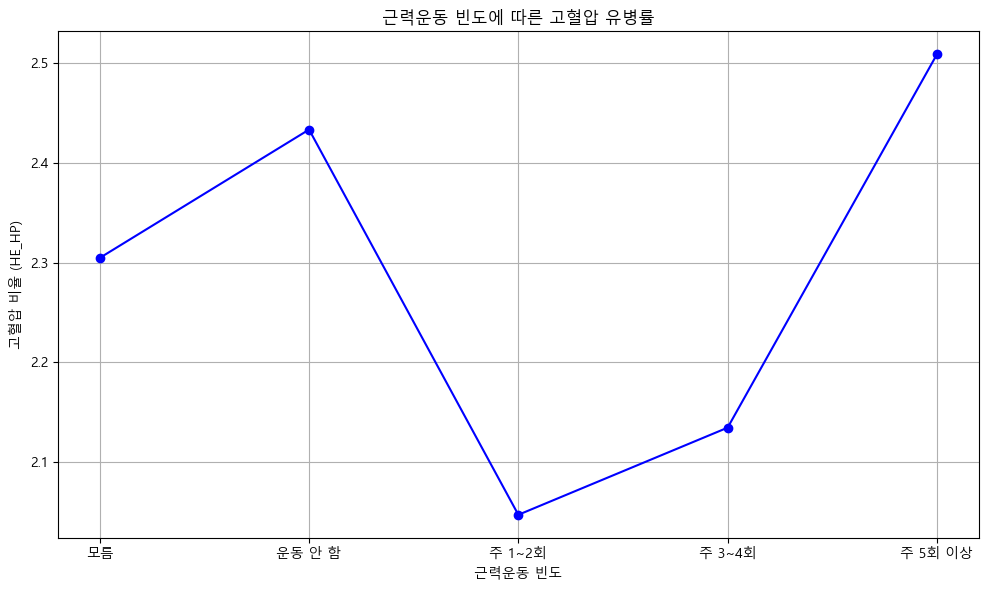

In [65]:
# BE5_1 그룹화 (방법 1 예시 사용)
def map_strength_exercise(val):
    if val == 1:
        return '운동 안 함'
    elif val in [2, 3]:
        return '주 1~2회'
    elif val in [4, 5]:
        return '주 3~4회'
    elif val == 6:
        return '주 5회 이상'
    else:
        return '모름'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

# 운동 그룹별 고혈압 비율 평균 계산 (예: HE_HP 변수)
group_stats = data.groupby('BE5_1_GROUP')['HE_HP'].mean().reset_index()

# 선 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(group_stats['BE5_1_GROUP'], group_stats['HE_HP'], marker='o', color='blue')
plt.xlabel('근력운동 빈도')
plt.ylabel('고혈압 비율 (HE_HP)')
plt.title('근력운동 빈도에 따른 고혈압 유병률')
plt.grid(True)
plt.tight_layout()
plt.show()


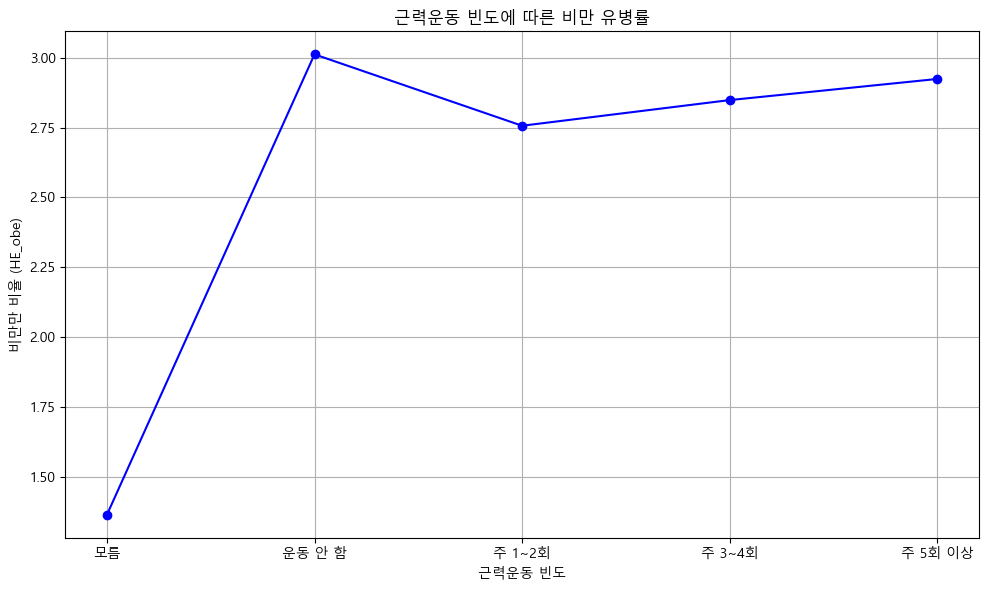

In [66]:
# BE5_1 그룹화 (방법 1 예시 사용)
def map_strength_exercise(val):
    if val == 1:
        return '운동 안 함'
    elif val in [2, 3]:
        return '주 1~2회'
    elif val in [4, 5]:
        return '주 3~4회'
    elif val == 6:
        return '주 5회 이상'
    else:
        return '모름'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

# 운동 그룹별 고혈압 비율 평균 계산 (예: HE_HP 변수)
group_stats = data.groupby('BE5_1_GROUP')['HE_obe'].mean().reset_index()

# 선 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(group_stats['BE5_1_GROUP'], group_stats['HE_obe'], marker='o', color='blue')
plt.xlabel('근력운동 빈도')
plt.ylabel('비만만 비율 (HE_obe)')
plt.title('근력운동 빈도에 따른 비만 유병률')
plt.grid(True)
plt.tight_layout()
plt.show()


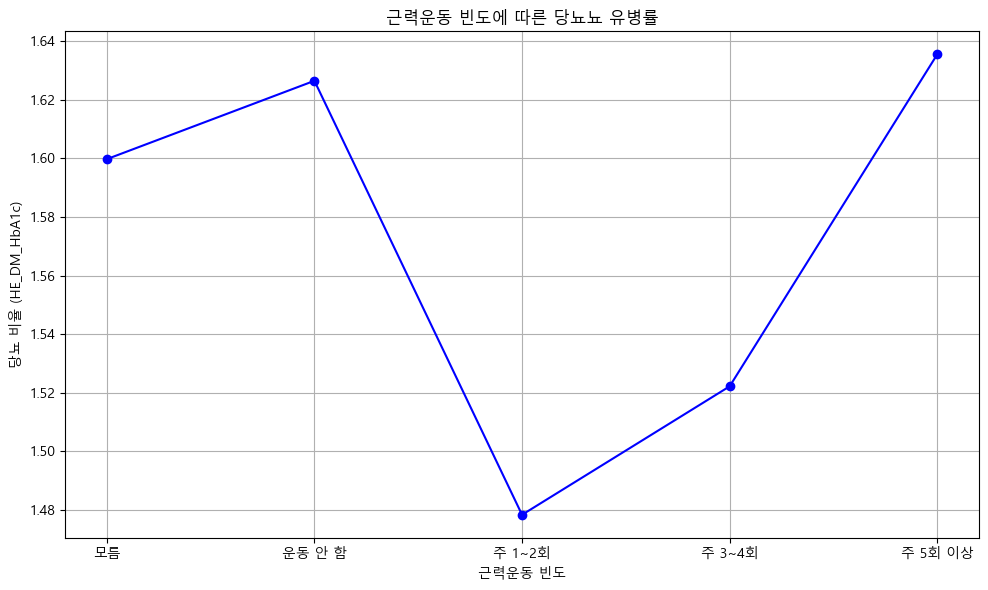

In [67]:
# BE5_1 그룹화 (방법 1 예시 사용)
def map_strength_exercise(val):
    if val == 1:
        return '운동 안 함'
    elif val in [2, 3]:
        return '주 1~2회'
    elif val in [4, 5]:
        return '주 3~4회'
    elif val == 6:
        return '주 5회 이상'
    else:
        return '모름'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

# 운동 그룹별 고혈압 비율 평균 계산 (예: HE_HP 변수)
group_stats = data.groupby('BE5_1_GROUP')['HE_DM_HbA1c'].mean().reset_index()

# 선 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(group_stats['BE5_1_GROUP'], group_stats['HE_DM_HbA1c'], marker='o', color='blue')
plt.xlabel('근력운동 빈도')
plt.ylabel('당뇨 비율 (HE_DM_HbA1c)')
plt.title('근력운동 빈도에 따른 당뇨뇨 유병률')
plt.grid(True)
plt.tight_layout()
plt.show()


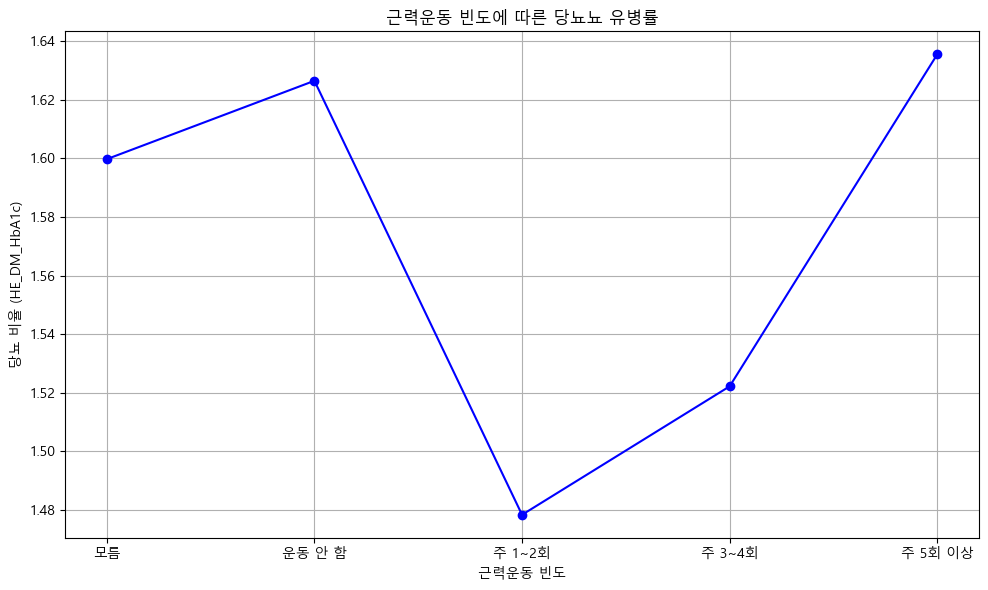

In [68]:
# BE5_1 그룹화 (방법 1 예시 사용)
def map_strength_exercise(val):
    if val == 1:
        return '운동 안 함'
    elif val in [2, 3]:
        return '주 1~2회'
    elif val in [4, 5]:
        return '주 3~4회'
    elif val == 6:
        return '주 5회 이상'
    else:
        return '모름'

data['BE5_1_GROUP'] = data['BE5_1'].apply(map_strength_exercise)

# 운동 그룹별 고혈압 비율 평균 계산 (예: HE_HP 변수)
group_stats = data.groupby('BE5_1_GROUP')['HE_DM_HbA1c'].mean().reset_index()

# 선 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(group_stats['BE5_1_GROUP'], group_stats['HE_DM_HbA1c'], marker='o', color='blue')
plt.xlabel('근력운동 빈도')
plt.ylabel('당뇨 비율 (HE_DM_HbA1c)')
plt.title('근력운동 빈도에 따른 당뇨뇨 유병률')
plt.grid(True)
plt.tight_layout()
plt.show()


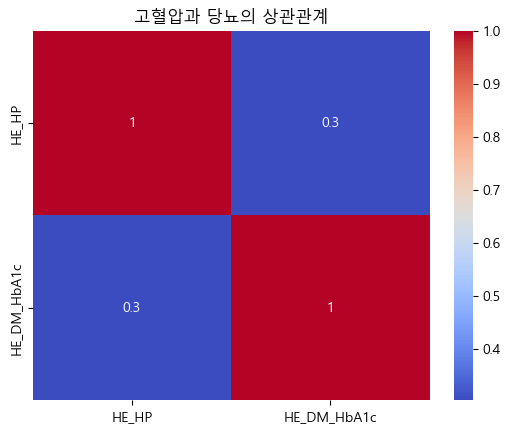

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# 고혈압 여부와 당뇨 여부가 각각 0/1로 있는 경우
sns.heatmap(data[['HE_HP', 'HE_DM_HbA1c']].corr(), annot=True, cmap='coolwarm')
plt.title('고혈압과 당뇨의 상관관계')
plt.show()


In [27]:
# 고혈압 여부에 따른 당뇨율 확인
pd.crosstab(data['HE_HP'], data['HE_DM_HbA1c'], normalize='index') * 100


HE_DM_HbA1c,1.0,2.0,3.0
HE_HP,,,
1.0,69.119918,22.782639,8.097444
2.0,54.258373,31.866029,13.875598
3.0,52.550741,35.271530,12.177729
4.0,36.713364,36.624416,26.662219


**당뇨병 예측 모델 선정**

In [72]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.5 MB 1.2 MB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.5 MB 3.0 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.5 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.5 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\장동민\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



▶ Mean F1 score (CV) of D_tree: 76.05%
▶ Test F1 score of D_tree: 71.17%
▶ Test Accuracy of D_tree: 71.09%

▶ Mean F1 score (CV) of RF: 76.78%
▶ Test F1 score of RF: 75.31%
▶ Test Accuracy of RF: 75.79%

▶ Mean F1 score (CV) of HistGB: 77.04%
▶ Test F1 score of HistGB: 74.33%
▶ Test Accuracy of HistGB: 74.54%

▶ Mean F1 score (CV) of XGB: 77.27%
▶ Test F1 score of XGB: 75.24%
▶ Test Accuracy of XGB: 75.41%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2095
[LightGBM] [Info] Number of data points in the train set: 8444, number of used features: 10
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` t

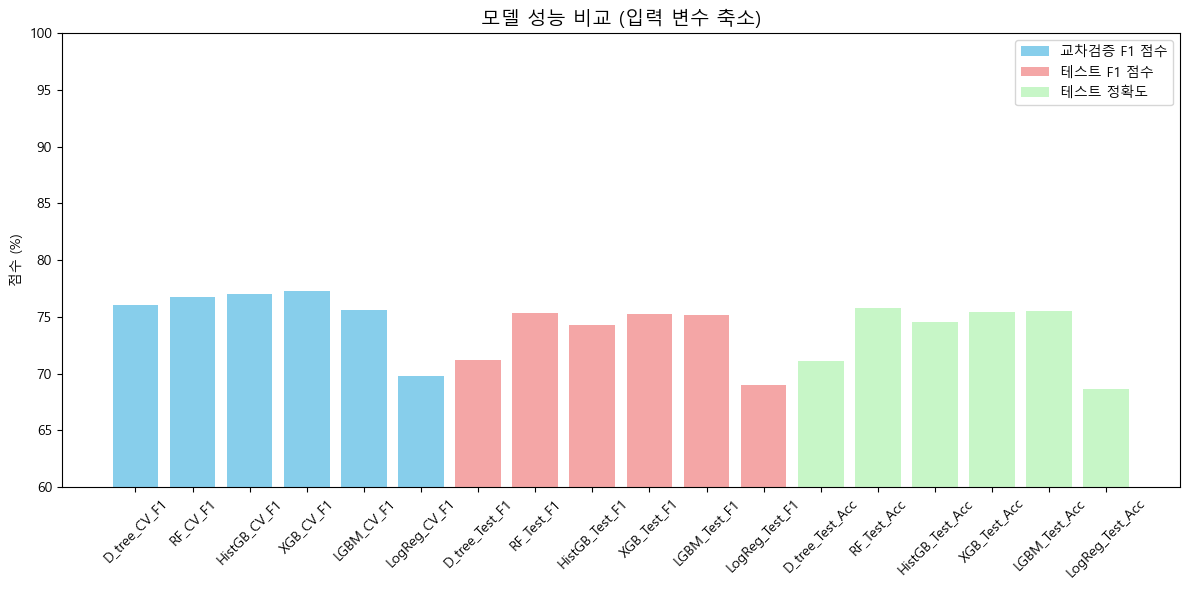

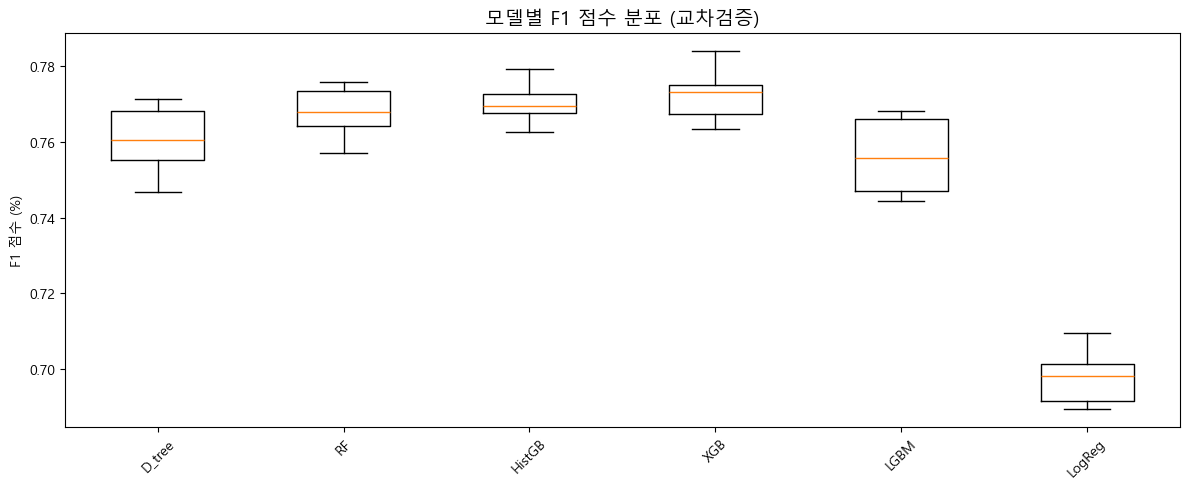

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 입력 피처 및 타겟 설정
HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2', 'sex', 'age']
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE로 오버샘플링
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 분류기 정의
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# 결과 저장용 리스트
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# 모델 훈련 및 평가
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n▶ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"▶ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"▶ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# 성능 바 차트 (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='교차검증 F1 점수')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='테스트 F1 점수', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='테스트 정확도', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('점수 (%)')
plt.title('모델 성능 비교 (입력 변수 축소)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot (CV F1 분포)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 점수 (%)')
ax.set_title('모델별 F1 점수 분포 (교차검증)', fontsize=14)
plt.tight_layout()
plt.show()


        
| Model   | CV F1(교차 검증) (%) | Test F1 (%) | Test Accuracy (%)  |
| ------- |      ---------      | ----------- | ----------------- |
| D_tree  |        75.17        |   75.60     |     76.77         |
| RF      |        76.26        |   74.83     |     75.41         |
| HistGB  |        77.58        |   74.31     |     74.50         |
| XGB     |        77.78        |   74.44     |     74.69         |
| LGBM    |        76.42        |   74.71     |     75.14         |
| LogReg  |        69.58        |   67.66     |     67.41         |


- CV F1 vs Test F1: 과대적합 정도 파악. CV F1이 높고 Test F1이 낮으면 과대적합 의심.
- Test F1 vs Test Accuracy: 클래스 불균형 문제의 영향 정도 파악. Accuracy가 F1보다 현저히 높으면 불균형 영향 크고, 모델이 소수 클래스를 잘 못 맞추고 있을 가능성 높음.
- 각 모델의 CV F1: 여러 모델 중 어떤 모델이 데이터에 대해 전반적인 일반화 잠재력이 높은지 비교.
- 각 모델의 Test F1: 불균형 상황을 고려했을 때, 최종적으로 어떤 모델이 실제 보지 못한 데이터에 대해 가장 좋은 종합적인 예측 성능을 보이는지 비교.
- 각 모델의 Test Accuracy: 모델별 전반적인 예측 성공률 비교 (F1과 함께 보며 불균형 영향 고려).

✅ 전반적인 결론
XGB와 HistGB가 CV(교차검증) 성능에서는 가장 높음, 
하지만 테스트 F1에서는 소폭 하락하여, 실제 일반화 성능에서는 D_tree와 큰 차이는 없음.

D_tree는 가장 단순하지만, 테스트 성능이 가장 좋음 (F1, Accuracy 모두).

LogReg은 성능이 가장 낮음, 복잡한 비선형 분포를 충분히 설명하지 못함을 시사.

📌 모델별 간단 평가
- **D_tree (결정트리)**

🎯 테스트에서 가장 높은 F1 (75.60%) 및 정확도 (76.77%)

모델이 단순하지만 SMOTE 및 적절한 파라미터 설정 덕에 잘 작동함.

일반화 잘됨, 오히려 복잡한 모델보다 안정적일 수 있음.

- **RF (랜덤포레스트)**

일반화 성능은 좋았으나 테스트에서 약간 낮아짐.

앙상블 특성상 복잡하지만 오버피팅은 크게 없음.

- **HistGB / XGB / LGBM**

모두 Gradient Boosting 계열. CV에서는 가장 좋지만 테스트에서는 소폭 하락.

데이터의 작은 변동에 민감할 수 있음.

과적합 가능성 약간 있음 (CV 성능 대비 테스트 성능 하락).

- **LogReg (로지스틱 회귀)**

가장 단순한 모델. 비선형 관계를 충분히 설명하지 못함.

데이터 복잡도 대비 부족한 표현력 → 성능 저조.

**HistGB로 모델 선정**

              precision    recall  f1-score   support

          정상       0.83      0.81      0.82      1442
      경계형 당뇨       0.66      0.65      0.66       796
          당뇨       0.58      0.62      0.60       401

    accuracy                           0.74      2639
   macro avg       0.69      0.70      0.69      2639
weighted avg       0.74      0.74      0.74      2639



<Figure size 600x600 with 0 Axes>

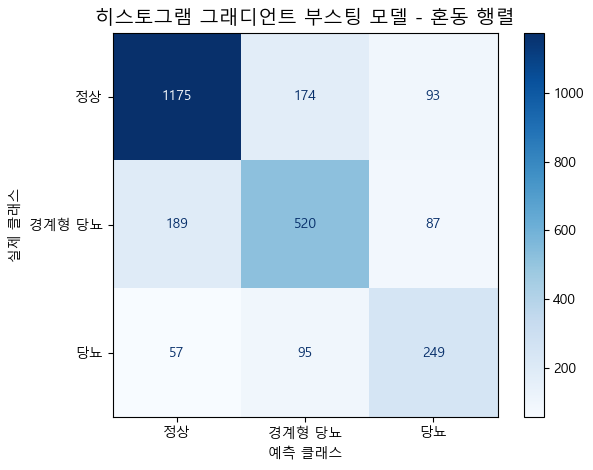

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2', 'sex', 'age']

# X와 y 정의
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# 훈련/테스트 분할 먼저 수행
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터에만 fit_transform
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터에는 transform만 적용

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTE를 스케일링된 훈련 데이터에 적용
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifier로 테스트 데이터 예측
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# 클래스 이름 한글로 정의
target_names_kor = ['정상', '경계형 당뇨', '당뇨']

# 평가 지표 출력 (한글 클래스명)
print(classification_report(y_test, y_pred, target_names=target_names_kor))

# 평가 지표 및 혼동행렬
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# 혼동 행렬 시각화
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names_kor)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("히스토그램 그래디언트 부스팅 모델 - 혼동 행렬", fontsize=14)
plt.xlabel("예측 클래스")
plt.ylabel("실제 클래스")
plt.tight_layout()
plt.show()

# classification_report DataFrame 변환 (선택)
class_report = classification_report(y_test, y_pred, target_names=target_names_kor, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

**클래스 불균형 해결하기**

In [102]:
!pip uninstall imbalanced-learn

^C


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt


HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']
#  'sex', 'age'
# X와 y 정의
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# 훈련/테스트 분할 먼저 수행
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터에만 fit_transform
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터에는 transform만 적용


from sklearn.metrics import classification_report

from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치 계산 ('balanced'는 빈도수에 반비례하여 자동 계산)
# compute_class_weight 함수에 원본 훈련 데이터의 y 값을 전달해야 합니다.
# 만약 SMOTE 적용 후의 데이터로 가중치를 계산하고 싶다면 y_train_smote를 전달합니다.
classes = np.unique(y_train) # 원본 훈련 데이터의 클래스 레이블
weights = compute_class_weight('balanced', classes=classes, y=y_train)

# 계산된 가중치를 딕셔너리 형태로 변환 {클래스_라벨: 가중치}
class_weights_dict = dict(zip(classes, weights))

print(f"계산된 클래스 가중치: {class_weights_dict}")


# HistGradientBoostingClassifier 모델 학습 (class_weight 적용)
# best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42) # 기존 모델
# class_weight 매개변수 추가
best_model_weighted = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=100,
    random_state=42,
    class_weight=class_weights_dict # 또는 'balanced' 문자열 사용 가능
)

# 스케일링된 훈련 데이터로 학습 (SMOTE 미적용 시 X_train_scaled 사용)
# 만약 SMOTE 결과를 사용한다면 X_train_smote_scaled (SMOTE 후 스케일링된 데이터) 사용
best_model_weighted.fit(X_train_scaled, y_train)

# 스케일링된 테스트 데이터로 예측
y_pred_weighted = best_model_weighted.predict(X_test_scaled)

# 성능 평가
print("\nClass Weight 적용 후 Classification Report:")
# y_test는 원본 테스트 데이터의 라벨입니다. 예측 결과와 비교합니다.
print(classification_report(y_test, y_pred_weighted))

# 추가적으로 F1 스코어를 각 클래스별로 확인하여 개선되었는지 비교합니다.
f1_weighted = f1_score(y_test, y_pred_weighted, average=None)
print(f"\nClass Weight 적용 후 클래스별 F1-score: {f1_weighted}")

계산된 클래스 가중치: {np.int64(0): np.float64(0.6097643783526856), np.int64(1): np.float64(1.1090527355810793), np.int64(2): np.float64(2.181729834791059)}

Class Weight 적용 후 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1227
           1       0.78      0.68      0.72       675
           2       0.71      0.71      0.71       343

    accuracy                           0.81      2245
   macro avg       0.78      0.77      0.77      2245
weighted avg       0.81      0.81      0.81      2245


Class Weight 적용 후 클래스별 F1-score: [0.8836478  0.72209026 0.70863836]


Shap로 Feature importance 확인

상관 행렬 샘플:
           HE_glu     HE_wc   HE_sbp1    HE_BMI     HE_TG   HE_chol  \
HE_glu   1.000000 -0.140642 -0.008619 -0.075297  0.013952 -0.177513   
HE_wc   -0.140642  1.000000  0.207662  0.202314  0.069464 -0.208419   
HE_sbp1 -0.008619  0.207662  1.000000 -0.020210  0.030679 -0.100094   
HE_BMI  -0.075297  0.202314 -0.020210  1.000000  0.099556  0.028767   
HE_TG    0.013952  0.069464  0.030679  0.099556  1.000000  0.008065   

         HE_LDL_drct  HE_HDL_st2  
HE_glu      0.007295    0.028159  
HE_wc      -0.096517   -0.011022  
HE_sbp1    -0.019406    0.015914  
HE_BMI      0.006691    0.061834  
HE_TG      -0.062410    0.096657  

 상관 행렬 샘플:
            공복혈당  허리둘레(cm)  수축기 혈압  체질량지수(BMI)  중성지방  총 콜레스테롤  LDL 콜레스테롤  \
공복혈당        1.00     -0.14   -0.01       -0.08  0.01    -0.18       0.01   
허리둘레(cm)   -0.14      1.00    0.21        0.20  0.07    -0.21      -0.10   
수축기 혈압     -0.01      0.21    1.00       -0.02  0.03    -0.10      -0.02   
체질량지수(BMI) -0.08      0.20   -0.02   

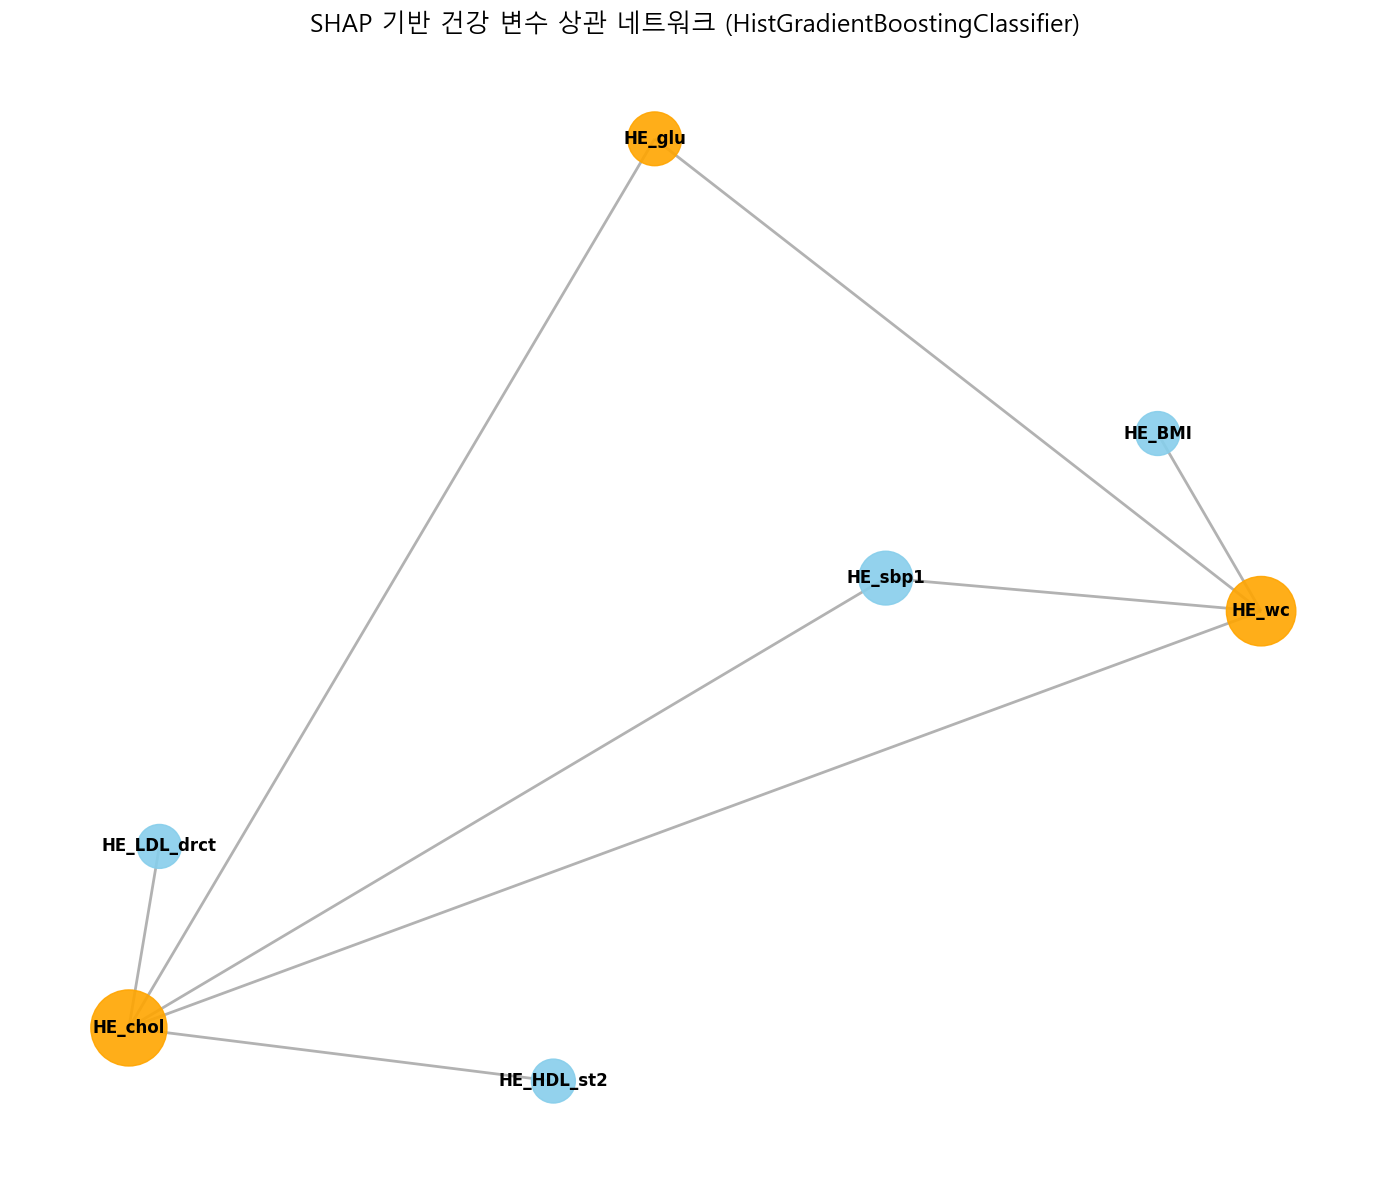


=== 질병 예측의 상위 3개 중요 피처 ===
공복혈당: SHAP 값 1.435
허리둘레(cm): SHAP 값 0.466
총 콜레스테롤: SHAP 값 0.170

=== 상위 3개 중요 피처 ===
1. 공복혈당
2. 허리둘레(cm)
3. 총 콜레스테롤

사용자 맞춤 리포트 요약
● 질병 예측 사례로 볼 때:
  → 당뇨 질병의 예측 결과는 다른 어떤 특성보다 공복혈당 값에 의해 가장 강력하게 결정되었으며,
    그다음으로 허리둘레(cm), 총 콜레스테롤 가 이 개인의 당뇨 예측에 중요한 영향을 미쳤습니다.


이러한 결과는 추후 사용자 맞춤형 건강 가이드라인 제공 시 중요한 기준이 될 것 입니다.


In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import networkx as nx


# 한글 변수명 매핑
feature_kor_map = {
'HE_glu': '공복혈당',
'HE_sbp1': '수축기 혈압',
'HE_BMI': '체질량지수(BMI)',
'HE_TG': '중성지방',
'HE_chol': '총 콜레스테롤',
'HE_LDL_drct': 'LDL 콜레스테롤',
'HE_HDL_st2': 'HDL 콜레스테롤',
'sex': '성별',
'age': '나이',
'HE_wc': '허리둘레(cm)'
}

HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']
#'age', 'sex'
# X와 y 정의
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

smote = SMOTE(random_state=42)
# SMOTE를 스케일링된 훈련 데이터에 적용
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifier로 테스트 데이터 예측
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
# 스케일링되고 SMOTE 적용된 훈련 데이터로 모델 학습
best_model.fit(X_train_smote, y_train_smote)
# 스케일링된 테스트 데이터로 예측
y_pred = best_model.predict(X_test_scaled)


# SHAP 값 계산
explainer = shap.TreeExplainer(best_model)
# SHAP 값을 스케일링된 테스트 데이터에 대해 계산
shap_values = explainer.shap_values(X_test_scaled)

# SHAP 값 처리 (클래스별 평균 절대값으로 2차원 변환)
if isinstance(shap_values, list):
    # 리스트 형태일 경우 (대부분의 다중 클래스 TreeExplainer) 클래스별 절대값의 평균
    # 각 클래스별 SHAP 값의 크기를 샘플별로 평균 (n_samples, n_features)
    shap_values_class = np.mean([np.abs(val) for val in shap_values], axis=0)
elif len(shap_values.shape) == 3:  # (n_samples, n_features, n_classes) 형태일 경우
    # 클래스 차원 평균 절대값 (n_samples, n_features)
    shap_values_class = np.mean(np.abs(shap_values), axis=2)
else: # (n_samples, n_features) 형태일 경우 (이진 분류 또는 이미 클래스별 평균된 경우)
    shap_values_class = np.abs(shap_values)


# SHAP DataFrame 생성 (컬럼명은 원본 특성 이름 사용)
# 스케일링된 데이터로 SHAP을 계산했지만, DataFrame 컬럼명은 원본 특성 이름 사용
shap_df = pd.DataFrame(shap_values_class, columns=HE_DM_HbA1c_input_features)


# 상관 행렬 계산 및 디버깅
print("상관 행렬 샘플:")
print(shap_df.corr().head())  # 상관 행렬 일부 출력
cor_matrix = shap_df.corr()
# 컬럼명을 한글로 바꾸어 출력
cor_matrix_kor = cor_matrix.rename(index=feature_kor_map, columns=feature_kor_map)
print("\n 상관 행렬 샘플:")
print(cor_matrix_kor.round(2).head())

# 네트워크 생성
G = nx.Graph()
threshold = 0.1  # 상관계수 임계값
edge_count = 0
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        corr_val = cor_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            G.add_edge(cor_matrix.columns[i], cor_matrix.columns[j], weight=corr_val)
            edge_count += 1
print(f"네트워크에 추가된 엣지 수: {edge_count}")

# 중심성 계산 (Degree Centrality)
centrality = nx.degree_centrality(G)
if not centrality:
    print("네트워크에 노드가 없음. threshold를 낮추거나 데이터를 확인하세요.")
else:
    # 상위 3개 노드 기준으로 색 구분
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]

    # 특정 샘플(첫 번째 테스트 샘플)의 상위 3개 중요 피처
    user_idx = 0  # 첫 번째 테스트 샘플
    top3_user_feats = shap_df.iloc[user_idx].abs().sort_values(ascending=False).head(3).index.tolist()

    # 노드 색상 설정
    node_colors = []
    for node in G.nodes:
        if node in top3_user_feats:
            node_colors.append('orange')  # 특정 샘플의 상위 피처
        elif node in top_nodes:
            node_colors.append('tomato')  # 중심성이 높은 피처
        else:
            node_colors.append('skyblue')  # 나머지 피처

    # 네트워크 시각화
    plt.figure(figsize=(14, 12))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    node_sizes = [500 + 3000 * centrality[n] for n in G.nodes]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    plt.title("SHAP 기반 건강 변수 상관 네트워크 (HistGradientBoostingClassifier)", fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # 중심성 Top 3 변수 (한글 이름)
    top_nodes_kor = [feature_kor_map.get(node, node) for node in top_nodes]
    # SHAP Top 3 변수 (한글 이름)
    top3_feats_kor = [feature_kor_map.get(feat, feat) for feat in top3_user_feats]

    # 상위 피처 출력
    # 중심성 피처 출력
    # print("=== 상위 중심성 피처 (Top 3) ===")
    # for node in top_nodes:
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{kor_name}: 중심성 {centrality[node]:.3f}")

    # 샘플 기반 SHAP 중요 피처 출력
    print("\n=== 질병 예측의 상위 3개 중요 피처 ===")
    for feat in top3_user_feats:
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{kor_name}: SHAP 값 {shap_val:.3f}")


    # print("\n=== 상위 중심성(연관성) 피처 (Top 3) ===")
    # for idx, node in enumerate(top_nodes, 1):
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{idx}. {kor_name}")

    print("\n=== 상위 3개 중요 피처 ===")
    for idx, feat in enumerate(top3_user_feats, 1):
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{idx}. {kor_name}")

    # 출력
    print("\n사용자 맞춤 리포트 요약")

    # print(f"● 전체적으로 볼 때 (중심성(연관성) 기반):\n  → {', '.join(top_nodes_kor)} 는(은) 모델이 당뇨 HbA1c 상태를 예측할 때")
    # print("    다른 많은 생체 지표들과 복합적으로 연관되어 작용하는 핵심적인 특성들입니다.\n")

    print(f"● 질병 예측 사례로 볼 때:\n  → 당뇨 질병의 예측 결과는 다른 어떤 특성보다 {top3_feats_kor[0]} 값에 의해 가장 강력하게 결정되었으며,")
    print(f"    그다음으로 {top3_feats_kor[1]}, {top3_feats_kor[2]} 가 이 개인의 당뇨 예측에 중요한 영향을 미쳤습니다.\n")

    print("\n이러한 결과는 추후 사용자 맞춤형 건강 가이드라인 제공 시 중요한 기준이 될 것 입니다.")
    

결론적으로, 이 수치들은 그 자체의 절대적인 크기보다는:

다른 특성들의 수치와 비교했을 때 상대적인 순위와 크기
모델이 예측을 수행하는 과정에서 해당 특성이 담당하는 역할 (중심적인 연결고리인지, 개별 예측을 강하게 미는지 등)

✅ 예시
사용자	공복혈당	허리둘레	총콜레스테롤	SHAP Top3 \
A (당뇨 수치 높음)	190	90	210	✅ 공복혈당, 허리둘레, 총콜레스테롤 \
B (정상혈당인데 복부비만)	95	110	180	✅ 허리둘레, BMI, 중성지방 \
C (콜레스테롤만 높음)	85	80	280	✅ 총콜레스테롤, LDL, HDL

- 모델 전체적으로 볼 때 (중심성 기반): **LDL 콜레스테롤, 나이, 총 콜레스테롤**는 모델이 당뇨 HbA1c 상태를 예측할 때 다른 많은 생체 지표들과 복합적으로 연관되어 작용하는 핵심적인 특성들이다. (이들은 단순히 단일 특성 중요도를 넘어, 모델의 내부 구조에서 중요한 역할을 함을 시사)
- 개별 예측 사례로 볼 때 (샘플별 SHAP 기반): 첫 번째 샘플의 예측 결과는 다른 어떤 특성보다 **공복혈당** 값에 의해 가장 강력하게 결정되었으며, 그다음으로 **HE_chol(총 콜레스테롤)과 age(나이)**가 이 개인의 예측에 중요한 영향을 미쳤다.
- 두 결과의 조합: **공복혈당**는 모델 전체의 중요성 구조(높은 중심성)에서도 나타나고 개별 예측의 가장 큰 드라이버로도 나타나는 등, 당뇨 예측에 매우 중요한 역할을 하는 변수임을 강하게 시사한다.

- **HE_glu (공복 혈당)**: 공복 혈당 수치는 당뇨병 진단의 가장 핵심적인 기준 중 하나이며, 혈당 조절 상태를 직접적으로 나타내는 지표입니다. 모델이 개별 예측 시 HE_glu를 가장 중요한 요인으로 사용하는 것은 매우 당연하며, 의학적으로도 혈당 관리가 당뇨 관리에 있어 가장 기본적이고 직접적인 부분임을 반영합니다.
- **age (나이)**: 나이는 2형 당뇨병 발병의 가장 강력한 비수정 가능 위험 인자입니다. 나이가 많아질수록 당뇨병 발병 위험이 유의미하게 증가합니다. 모델이 age를 중요한 예측 변수로 사용하고, 그 영향력 패턴이 다른 변수들과 복합적으로 연관되어 있음(높은 중심성)을 학습한 것은 나이가 당뇨 예측에 있어 핵심적인 배경 요인임을 뒷받침합니다.
- **HE_chol (총 콜레스테롤) 및 HE_LDL_drct (LDL 콜레스테롤)**: 높은 LDL 콜레스테롤을 포함한 이상지질혈증은 비만, 고혈압과 함께 대사증후군의 주요 구성 요소이며, 인슐린 저항성과 2형 당뇨병 발병 위험을 높이는 것으로 알려져 있습니다. 모델이 HE_chol과 HE_LDL_drct의 영향력 패턴이 다른 변수들과 복잡하게 연관되어 있음을 학습한 것은 콜레스테롤 수치 관리가 당뇨병 자체의 위험뿐 아니라 동반될 수 있는 대사 질환 관리에도 중요하다는 의학적 사실과 일치합니다.

**고혈압 예측 모델 선정**


▶ Mean F1 score (CV) of D_tree: 57.44%
▶ Test F1 score of D_tree: 57.87%
▶ Test Accuracy of D_tree: 54.95%

▶ Mean F1 score (CV) of RF: 63.44%
▶ Test F1 score of RF: 64.31%
▶ Test Accuracy of RF: 63.09%

▶ Mean F1 score (CV) of HistGB: 67.80%
▶ Test F1 score of HistGB: 67.06%
▶ Test Accuracy of HistGB: 66.58%

▶ Mean F1 score (CV) of XGB: 67.28%
▶ Test F1 score of XGB: 66.79%
▶ Test Accuracy of XGB: 66.58%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 8444, number of used features: 12
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was

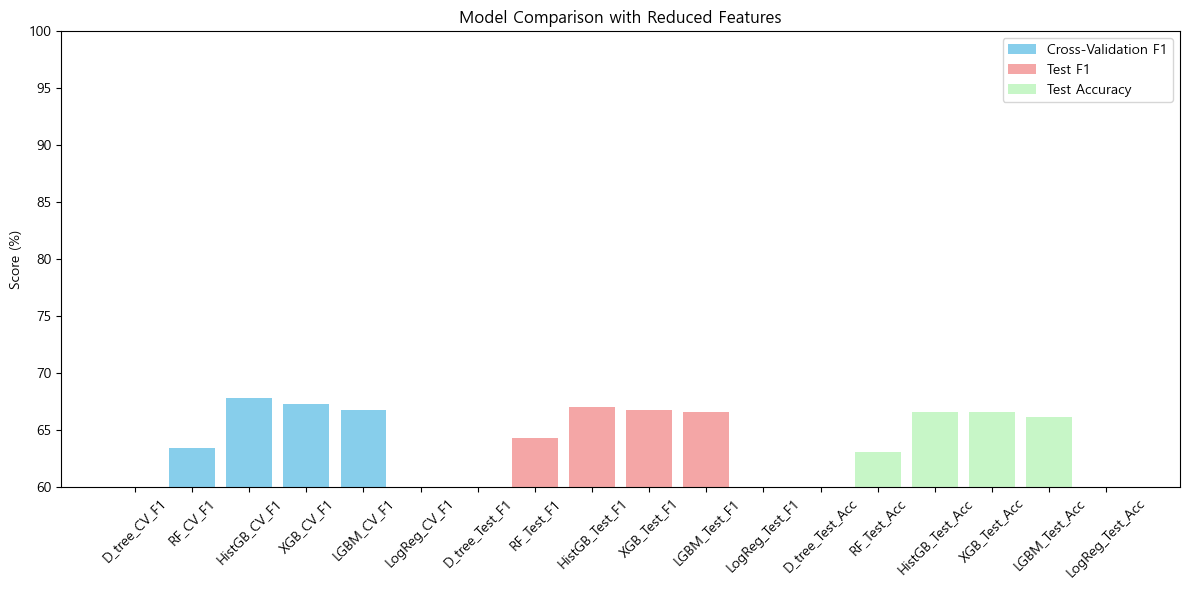

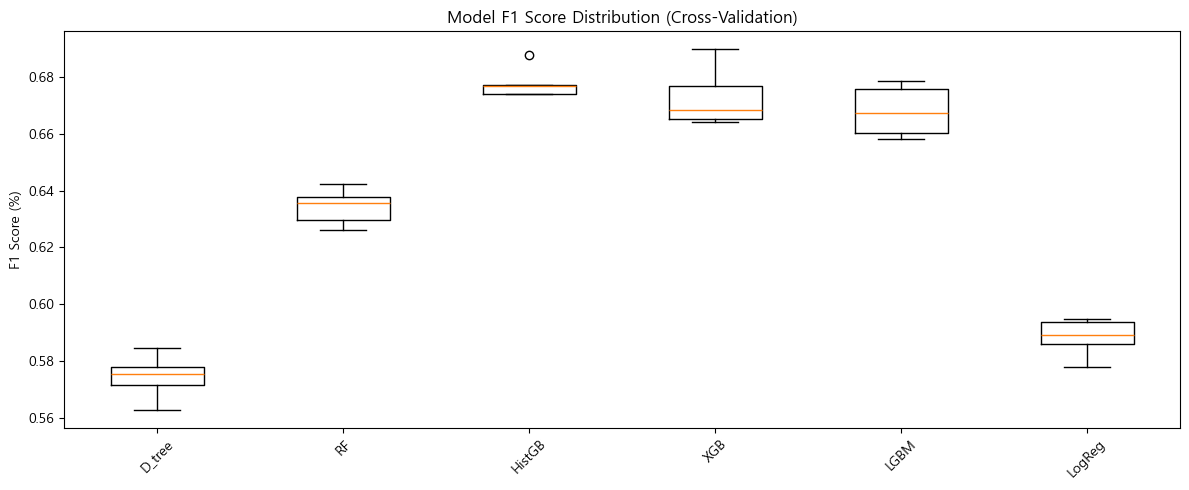

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 입력 피처 및 타겟 설정
HE_HP_input_features= ['age','HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']

# X와 y 정의
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE로 오버샘플링
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 분류기 정의
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# 결과 저장용 리스트
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# 모델 훈련 및 평가
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n▶ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"▶ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"▶ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# 성능 시각화
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='Cross-Validation F1')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='Test F1', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='Test Accuracy', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Score (%)')
plt.title('Model Comparison with Reduced Features')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Score (%)')
ax.set_title('Model F1 Score Distribution (Cross-Validation)')
plt.tight_layout()
plt.show()


| Model   | CV F1 (%) | Test F1 (%) | Test Accuracy (%) |
| ------- | --------- | ----------- | ----------------- |
| D_tree  | 57.44     | 57.87       | 54.95             |
| RF      | 63.44     | 64.31       | 63.09             |
| HistGB  | 67.80     | 67.06       | 66.58             |
| XGB     | 67.28     | 66.79       | 66.58             |
| LGBM    | 66.79     | 66.55       | 66.16             |
| LogReg  | 58.83     | 58.28       | 56.54             |


HistGB 모델로 선정

                       precision    recall  f1-score   support

     Class 0 (Normal)       0.81      0.80      0.80      1163
     Class 1 (Pre_hp)       0.30      0.39      0.34       209
Class 2 (Pre_high_hp)       0.51      0.58      0.54       365
    Class 2 (High_hp)       0.71      0.63      0.67       902

             accuracy                           0.68      2639
            macro avg       0.58      0.60      0.59      2639
         weighted avg       0.69      0.68      0.68      2639



<Figure size 600x600 with 0 Axes>

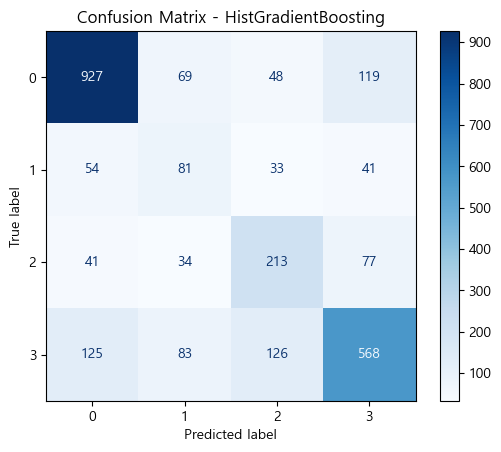

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 입력 피처 및 타겟 설정
HE_HP_input_features= ['age','HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']

# X와 y 정의
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# 훈련/테스트 분할 먼저 수행
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터에만 fit_transform
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터에는 transform만 적용

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTE를 스케일링된 훈련 데이터에 적용
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifier로 테스트 데이터 예측
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# 클래스별 F1 스코어 출력
print(classification_report(y_test, y_pred, target_names=['Class 0 (Normal)', 'Class 1 (Pre_hp)', 'Class 2 (Pre_high_hp)', 'Class 2 (High_hp)']))

# 평가 지표 및 혼동행렬
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# 시각화
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - HistGradientBoosting")
plt.show()

**클래스 불균형 해결하기**

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 입력 피처 및 타겟 설정
HE_HP_input_features= ['HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']
#'age'
# X와 y 정의
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# 훈련/테스트 분할 먼저 수행
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터에만 fit_transform
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터에는 transform만 적용


from sklearn.metrics import classification_report

from sklearn.utils.class_weight import compute_class_weight

# 클래스 가중치 계산 ('balanced'는 빈도수에 반비례하여 자동 계산)
# compute_class_weight 함수에 원본 훈련 데이터의 y 값을 전달해야 합니다.
# 만약 SMOTE 적용 후의 데이터로 가중치를 계산하고 싶다면 y_train_smote를 전달합니다.
classes = np.unique(y_train) # 원본 훈련 데이터의 클래스 레이블
weights = compute_class_weight('balanced', classes=classes, y=y_train)

# 계산된 가중치를 딕셔너리 형태로 변환 {클래스_라벨: 가중치}
class_weights_dict = dict(zip(classes, weights))

print(f"계산된 클래스 가중치: {class_weights_dict}")


# HistGradientBoostingClassifier 모델 학습 (class_weight 적용)
# best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42) # 기존 모델
# class_weight 매개변수 추가
best_model_weighted = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=100,
    random_state=42,
    class_weight=class_weights_dict # 또는 'balanced' 문자열 사용 가능
)

# 스케일링된 훈련 데이터로 학습 (SMOTE 미적용 시 X_train_scaled 사용)
# 만약 SMOTE 결과를 사용한다면 X_train_smote_scaled (SMOTE 후 스케일링된 데이터) 사용
best_model_weighted.fit(X_train_scaled, y_train)

# 스케일링된 테스트 데이터로 예측
y_pred_weighted = best_model_weighted.predict(X_test_scaled)

# 성능 평가
print("\nClass Weight 적용 후 Classification Report:")
# y_test는 원본 테스트 데이터의 라벨입니다. 예측 결과와 비교합니다.
print(classification_report(y_test, y_pred_weighted))

# 추가적으로 F1 스코어를 각 클래스별로 확인하여 개선되었는지 비교합니다.
f1_weighted = f1_score(y_test, y_pred_weighted, average=None)
print(f"\nClass Weight 적용 후 클래스별 F1-score: {f1_weighted}")

계산된 클래스 가중치: {np.int64(0): np.float64(0.5667760666498359), np.int64(1): np.float64(3.179886685552408), np.int64(2): np.float64(1.8090249798549556), np.int64(3): np.float64(0.7307942708333334)}

Class Weight 적용 후 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       990
           1       0.31      0.46      0.37       176
           2       0.49      0.53      0.51       311
           3       0.73      0.65      0.69       768

    accuracy                           0.69      2245
   macro avg       0.59      0.62      0.60      2245
weighted avg       0.71      0.69      0.70      2245


Class Weight 적용 후 클래스별 F1-score: [0.83563748 0.37155963 0.50617284 0.68547832]


shap 로 feature selections

이는 비만(허리둘레)과 이상지질혈증(콜레스테롤)이 고혈압을 포함한 대사증후군의 중요한 구성 요소이자 위험 인자라는 의학적 사실과 일치합니다. 모델은 이러한 간접적인 위험 인자 정보도 고혈압 예측에 중요하게 활용하고 있음을 알 수 있습니다.

- age (나이): 나이는 고혈압, 당뇨병, 심혈관 질환 등 여러 질병의 강력한 비수정 가능 위험 인자입니다. 모델이 나이를 중요한 예측 변수이자 중심성이 높은 변수로 사용한 것은 나이가 질병 예측에 있어 핵심적인 배경 요인임을 뒷받침합니다.
- HE_LDL_drct (LDL 콜레스테롤): 높은 LDL 콜레스테롤을 포함한 이상지질혈증은 고혈압, 당뇨병, 비만 등이 동반되는 대사증후군의 주요 구성 요소이며, 심혈관 질환 발병 위험을 높입니다. 모델이 HE_LDL_drct의 영향력 패턴이 다른 변수들과 복잡하게 연관되어 있음을 학습한 것은 콜레스테롤 관리가 대사 건강 및 관련 질병 위험 관리에도 중요함을 시사합니다.
- HE_ast (AST, 간 기능 수치): AST는 간세포 손상 지표로 주로 사용되지만, **비알코올성 지방간 질환(NAFLD)**과도 연관이 있습니다. NAFLD는 대사증후군의 또 다른 구성 요소이며, 고혈압, 당뇨병, 심혈관 질환의 위험을 높이는 것으로 알려져 있습니다. HE_ast가 높은 중심성을 보인다는 것은, 모델이 간 기능과 관련된 대사적 상태가 해당 질병 예측에 있어 다른 요인들과 복합적으로 연관되어 있다고 학습했음을 시사합니다. 이는 직접적인 지표는 아니지만, 질병과 관련된 간접적인 생리학적 연관성을 모델이 포착했을 가능성을 보여줍니다.

상관 행렬 샘플:
          HE_sbp1   HE_dbp1     HE_wc    HE_glu    HE_BMI     HE_TG   HE_crea  \
HE_sbp1  1.000000 -0.018392  0.074599 -0.053684 -0.062175  0.019500 -0.090017   
HE_dbp1 -0.018392  1.000000  0.044804 -0.013468  0.066568 -0.025350 -0.005616   
HE_wc    0.074599  0.044804  1.000000  0.116823  0.345073  0.081959 -0.036415   
HE_glu  -0.053684 -0.013468  0.116823  1.000000 -0.007473  0.070145 -0.068033   
HE_BMI  -0.062175  0.066568  0.345073 -0.007473  1.000000  0.008333  0.038773   

           HE_ast   HE_chol  HE_LDL_drct  HE_HDL_st2  
HE_sbp1  0.055746 -0.056820    -0.173867   -0.015582  
HE_dbp1  0.002150 -0.058084    -0.158799   -0.020652  
HE_wc    0.069391  0.005812     0.022134    0.079442  
HE_glu   0.141844 -0.004190    -0.002972   -0.014256  
HE_BMI  -0.011429  0.027596     0.036731    0.111011  

 상관 행렬 샘플:
            수축기 혈압  이완기 혈압  허리둘레(cm)  공복혈당  체질량지수(BMI)  중성지방  HE_crea  HE_ast  \
수축기 혈압        1.00   -0.02      0.07 -0.05       -0.06  0.02    -0.09    0.06   

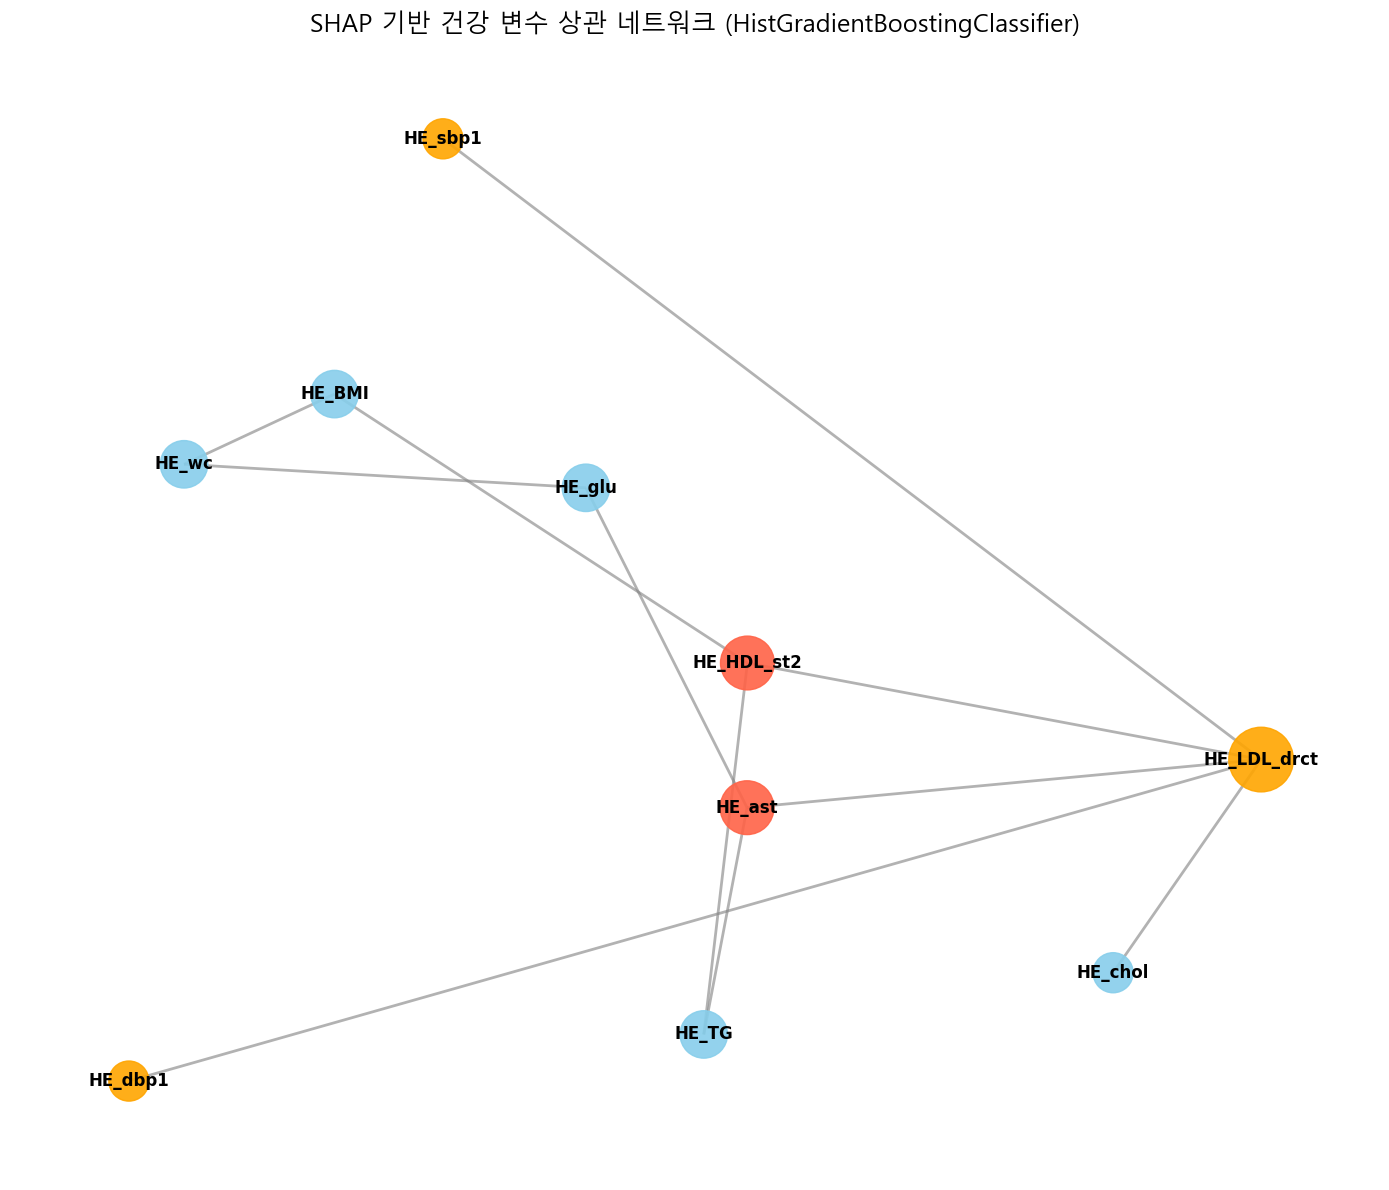


=== 질병 예측의 상위 3개 중요 피처 ===
이완기 혈압: SHAP 값 1.436
수축기 혈압: SHAP 값 0.780
LDL 콜레스테롤: SHAP 값 0.150

=== 상위 3개 중요 피처 ===
1. 이완기 혈압
2. 수축기 혈압
3. LDL 콜레스테롤

사용자 맞춤 리포트 요약
● 질병 예측 사례로 볼 때:
  → 고혈압 질병의 예측 결과는 다른 어떤 특성보다 이완기 혈압 값에 의해 가장 강력하게 결정되었으며,
    그다음으로 수축기 혈압, LDL 콜레스테롤 가 이 개인의 고혈압 예측에 중요한 영향을 미쳤습니다.


이러한 결과는 추후 사용자 맞춤형 건강 가이드라인 제공 시 중요한 기준이 될 것 입니다.


In [95]:


# 한글 변수명 매핑
feature_kor_map = {
'HE_glu': '공복혈당',
'HE_sbp1': '수축기 혈압',
'HE_dbp1': '이완기 혈압',
'HE_BMI': '체질량지수(BMI)',
'HE_TG': '중성지방',
'HE_chol': '총 콜레스테롤',
'HE_LDL_drct': 'LDL 콜레스테롤',
'HE_HDL_st2': 'HDL 콜레스테롤',
'sex': '성별',
'age': '나이',
'HE_wc' : '허리둘레(cm)'
}

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import networkx as nx

# 입력 피처 및 타겟 설정
HE_HP_input_features= ['HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']
#'age'
# X와 y 정의
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

smote = SMOTE(random_state=42)
# SMOTE를 스케일링된 훈련 데이터에 적용
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifier로 테스트 데이터 예측
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
# 스케일링되고 SMOTE 적용된 훈련 데이터로 모델 학습
best_model.fit(X_train_smote, y_train_smote)
# 스케일링된 테스트 데이터로 예측
y_pred = best_model.predict(X_test_scaled)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifier로 테스트 데이터 예측
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
# 스케일링되고 SMOTE 적용된 훈련 데이터로 모델 학습
best_model.fit(X_train_smote, y_train_smote)
# 스케일링된 테스트 데이터로 예측
y_pred = best_model.predict(X_test_scaled)


# SHAP 값 계산
explainer = shap.TreeExplainer(best_model)
# SHAP 값을 스케일링된 테스트 데이터에 대해 계산
shap_values = explainer.shap_values(X_test_scaled)

# SHAP 값 처리 (클래스별 평균 절대값으로 2차원 변환)
if isinstance(shap_values, list):
    # 리스트 형태일 경우 (대부분의 다중 클래스 TreeExplainer) 클래스별 절대값의 평균
    # 각 클래스별 SHAP 값의 크기를 샘플별로 평균 (n_samples, n_features)
    shap_values_class = np.mean([np.abs(val) for val in shap_values], axis=0)
elif len(shap_values.shape) == 3:  # (n_samples, n_features, n_classes) 형태일 경우
    # 클래스 차원 평균 절대값 (n_samples, n_features)
    shap_values_class = np.mean(np.abs(shap_values), axis=2)
else: # (n_samples, n_features) 형태일 경우 (이진 분류 또는 이미 클래스별 평균된 경우)
    shap_values_class = np.abs(shap_values)


# SHAP DataFrame 생성 (컬럼명은 원본 특성 이름 사용)
# 스케일링된 데이터로 SHAP을 계산했지만, DataFrame 컬럼명은 원본 특성 이름 사용
shap_df = pd.DataFrame(shap_values_class, columns=HE_HP_input_features)


# 상관 행렬 계산 및 디버깅
print("상관 행렬 샘플:")
print(shap_df.corr().head())  # 상관 행렬 일부 출력
cor_matrix = shap_df.corr()
# 컬럼명을 한글로 바꾸어 출력
cor_matrix_kor = cor_matrix.rename(index=feature_kor_map, columns=feature_kor_map)
print("\n 상관 행렬 샘플:")
print(cor_matrix_kor.round(2).head())

# 네트워크 생성
G = nx.Graph()
threshold = 0.1  # 상관계수 임계값
edge_count = 0
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        corr_val = cor_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            G.add_edge(cor_matrix.columns[i], cor_matrix.columns[j], weight=corr_val)
            edge_count += 1
print(f"네트워크에 추가된 엣지 수: {edge_count}")

# 중심성 계산 (Degree Centrality)
centrality = nx.degree_centrality(G)
if not centrality:
    print("네트워크에 노드가 없음. threshold를 낮추거나 데이터를 확인하세요.")
else:
    # 상위 3개 노드 기준으로 색 구분
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]

    # 특정 샘플(첫 번째 테스트 샘플)의 상위 3개 중요 피처
    user_idx = 0  # 첫 번째 테스트 샘플
    top3_user_feats = shap_df.iloc[user_idx].abs().sort_values(ascending=False).head(3).index.tolist()

    # 노드 색상 설정
    node_colors = []
    for node in G.nodes:
        if node in top3_user_feats:
            node_colors.append('orange')  # 특정 샘플의 상위 피처
        elif node in top_nodes:
            node_colors.append('tomato')  # 중심성이 높은 피처
        else:
            node_colors.append('skyblue')  # 나머지 피처

    # 네트워크 시각화
    plt.figure(figsize=(14, 12))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    node_sizes = [500 + 3000 * centrality[n] for n in G.nodes]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    plt.title("SHAP 기반 건강 변수 상관 네트워크 (HistGradientBoostingClassifier)", fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # 중심성 Top 3 변수 (한글 이름)
    top_nodes_kor = [feature_kor_map.get(node, node) for node in top_nodes]
    # SHAP Top 3 변수 (한글 이름)
    top3_feats_kor = [feature_kor_map.get(feat, feat) for feat in top3_user_feats]

    # 상위 피처 출력
    # 중심성 피처 출력
    # print("=== 상위 중심성 피처 (Top 3) ===")
    # for node in top_nodes:
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{kor_name}: 중심성 {centrality[node]:.3f}")

    # 샘플 기반 SHAP 중요 피처 출력
    print("\n=== 질병 예측의 상위 3개 중요 피처 ===")
    for feat in top3_user_feats:
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{kor_name}: SHAP 값 {shap_val:.3f}")


    # print("\n=== 상위 중심성(연관성) 피처 (Top 3) ===")
    # for idx, node in enumerate(top_nodes, 1):
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{idx}. {kor_name}")

    print("\n=== 상위 3개 중요 피처 ===")
    for idx, feat in enumerate(top3_user_feats, 1):
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{idx}. {kor_name}")

    # 출력
    print("\n사용자 맞춤 리포트 요약")

    # print(f"● 전체적으로 볼 때 (중심성(연관성) 기반):\n  → {', '.join(top_nodes_kor)} 는(은) 모델이 고혈압 상태를 예측할 때")
    # print("    다른 많은 생체 지표들과 복합적으로 연관되어 작용하는 핵심적인 특성들입니다.\n")

    print(f"● 질병 예측 사례로 볼 때:\n  → 고혈압 질병의 예측 결과는 다른 어떤 특성보다 {top3_feats_kor[0]} 값에 의해 가장 강력하게 결정되었으며,")
    print(f"    그다음으로 {top3_feats_kor[1]}, {top3_feats_kor[2]} 가 이 개인의 고혈압 예측에 중요한 영향을 미쳤습니다.\n")

    print("\n이러한 결과는 추후 사용자 맞춤형 건강 가이드라인 제공 시 중요한 기준이 될 것 입니다.")
    

비만 **다중 모델 분석**


▶ Mean F1 score (CV) of D_tree: 63.46%
▶ Test F1 score of D_tree: 63.55%
▶ Test Accuracy of D_tree: 71.54%

▶ Mean F1 score (CV) of RF: 96.09%
▶ Test F1 score of RF: 96.20%
▶ Test Accuracy of RF: 96.17%

▶ Mean F1 score (CV) of HistGB: 98.88%
▶ Test F1 score of HistGB: 98.25%
▶ Test Accuracy of HistGB: 98.26%

▶ Mean F1 score (CV) of XGB: 99.06%
▶ Test F1 score of XGB: 98.60%
▶ Test Accuracy of XGB: 98.60%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2811
[LightGBM] [Info] Number of data points in the train set: 8444, number of used features: 13
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Sta

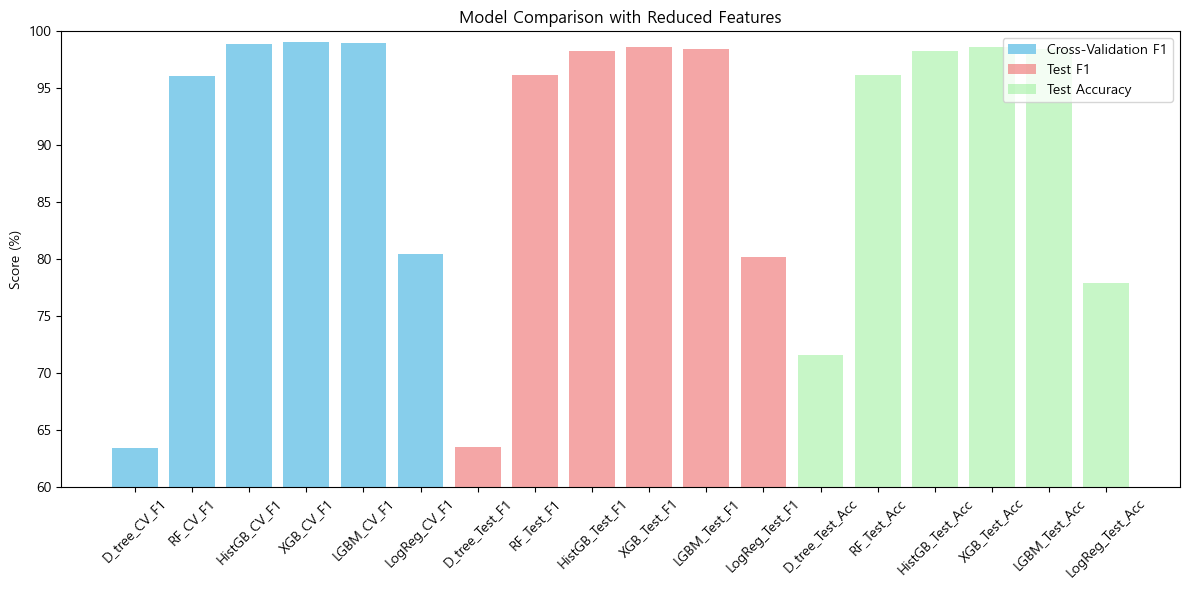

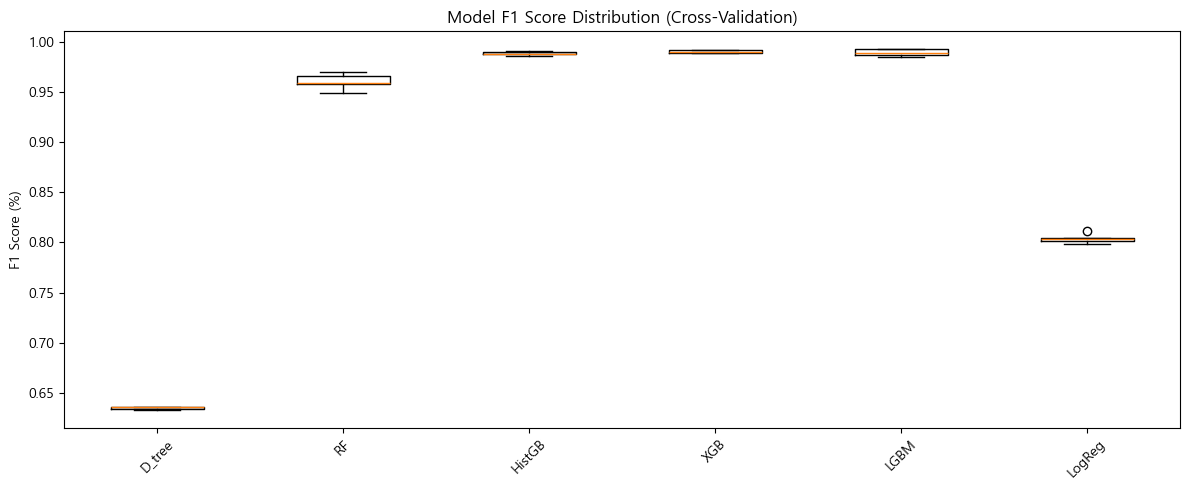

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 입력 피처 및 타겟 설정
HE_obe_input_features= [ 'HE_wc', 'HE_wt', 'HE_sbp1', 'HE_ht', 'HE_dbp1',  'HE_glu', 'HE_alt', 'HE_crea', 'HE_TG', 'HE_HDL_st2', "HE_BMI", 'age', 'sex']

# X와 y 정의
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTE로 오버샘플링
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 분류기 정의
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# 결과 저장용 리스트
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# 모델 훈련 및 평가
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n▶ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"▶ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"▶ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# 성능 시각화
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='Cross-Validation F1')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='Test F1', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='Test Accuracy', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Score (%)')
plt.title('Model Comparison with Reduced Features')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Score (%)')
ax.set_title('Model F1 Score Distribution (Cross-Validation)')
plt.tight_layout()
plt.show()


| Model   | CV F1 (%) | Test F1 (%) | Test Accuracy (%) |
| ------- | --------- | ----------- | ----------------- |
| D_tree  | 63.46     | 63.55       | 71.54             |
| RF      | 96.09     | 96.20       | 96.17             |
| HistGB  | 98.88     | 98.25       | 98.26             |
| XGB     | 99.06     | 98.60       | 98.60             |
| LGBM    | 98.97     | 98.48       | 98.48             |
| LogReg  | 80.42     | 80.16       | 77.95             |


HistGB 선정

                     precision    recall  f1-score   support

      Class 0 (Low)       0.97      0.99      0.98        94
   Class 1 (Normal)       1.00      0.99      1.00       825
Class 2 (Pre-obese)       0.99      0.99      0.99       496
   Class 2 (Obese1)       0.99      0.99      0.99       646
   Class 3 (Obese2)       0.98      0.97      0.97       118
   Class 4 (Obese3)       0.97      1.00      0.99        66

           accuracy                           0.99      2245
          macro avg       0.98      0.99      0.99      2245
       weighted avg       0.99      0.99      0.99      2245



<Figure size 600x600 with 0 Axes>

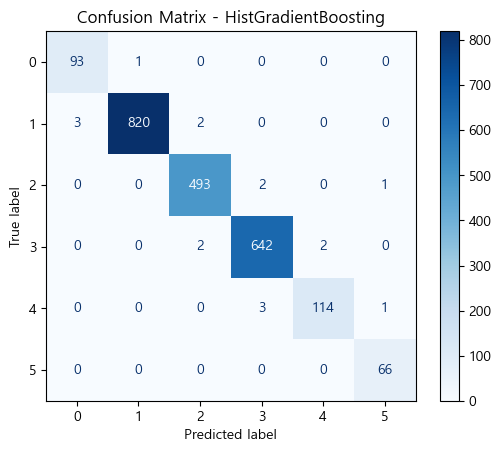

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# 입력 피처 및 타겟 설정
HE_obe_input_features= [ 'HE_wc', 'HE_wt', 'HE_sbp1', 'HE_ht', 'HE_dbp1',  'HE_glu', 'HE_alt', 'HE_crea', 'HE_TG', 'HE_HDL_st2', "HE_BMI", 'age', 'sex']

# X와 y 정의
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1

# 훈련/테스트 분할 먼저 수행
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터에만 fit_transform
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터에는 transform만 적용

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTE를 스케일링된 훈련 데이터에 적용
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifier로 테스트 데이터 예측
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# 클래스별 F1 스코어 출력
print(classification_report(y_test, y_pred, target_names=['Class 0 (Low)', 'Class 1 (Normal)', 'Class 2 (Pre-obese)', 'Class 2 (Obese1)', 'Class 3 (Obese2)', 'Class 4 (Obese3)']))
'Low', 'Normal', 'Pre-obese', 'Obese1', 'Obese2', 'Obese3'
# 평가 지표 및 혼동행렬
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# 시각화
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - HistGradientBoosting")
plt.show()

HE_BMI는 중심성(0.545)에서도 상위권이지만, 첫 번째 샘플에 대한 SHAP 값(3.159)이 다른 특성들의 SHAP 값(0.413, 0.206 등)에 비해 월등히 높습니다. 이는 모델이 비만 상태를 예측할 때 **가장 강력하고 직접적으로 의존하는 특성이 HE_BMI**라는 것을 명확히 보여줍니다.

상관 행렬은 **해당 질병(종속 변수)을 예측하는 모델 내에서, 독립 변수들의 '예측에 대한 기여도(SHAP 값)' 패턴이 어떻게 서로 연관되어 있는가**를 나타내는 것

상관 행렬 샘플:
            HE_wc     HE_wt   HE_sbp1     HE_ht   HE_dbp1    HE_glu    HE_alt  \
HE_wc    1.000000 -0.225441  0.346168 -0.183762  0.010023  0.049818  0.078285   
HE_wt   -0.225441  1.000000 -0.111827  0.312991 -0.008322  0.027741  0.018898   
HE_sbp1  0.346168 -0.111827  1.000000 -0.117060  0.320166  0.082849  0.209176   
HE_ht   -0.183762  0.312991 -0.117060  1.000000  0.029039 -0.002006 -0.037664   
HE_dbp1  0.010023 -0.008322  0.320166  0.029039  1.000000  0.044969  0.202583   

          HE_crea     HE_TG  HE_HDL_st2    HE_BMI       age       sex  
HE_wc    0.066295  0.094651   -0.120019  0.301906  0.015908 -0.200780  
HE_wt    0.022983 -0.139383    0.003457 -0.487088  0.065132  0.206431  
HE_sbp1  0.243955  0.156284    0.076426  0.081955  0.144825 -0.061578  
HE_ht    0.042955 -0.065344    0.065478 -0.402007  0.277689  0.320988  
HE_dbp1  0.178625  0.152138    0.140551 -0.132152  0.295261  0.136201  

 상관 행렬 샘플:
          허리둘레(cm)  무게(kg)  수축기 혈압  신장(cm)  이완기 혈압  공복혈당  H

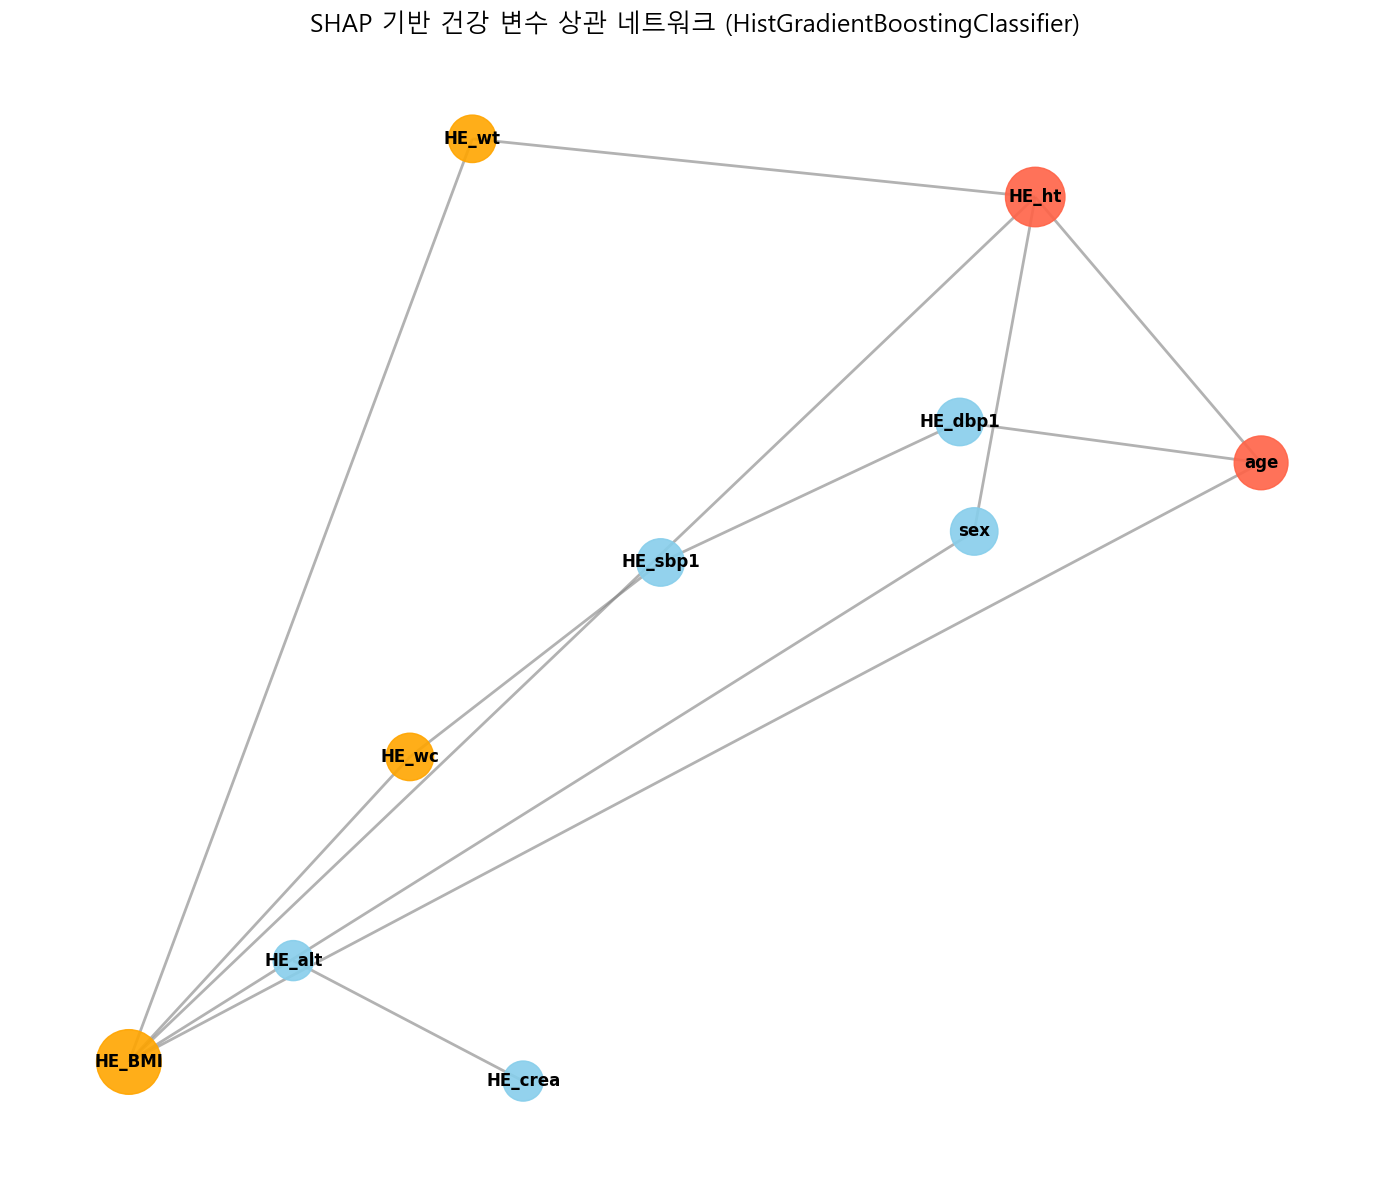


=== 질병 예측의 상위 3개 중요 피처 ===
체질량지수(BMI): SHAP 값 4.109
허리둘레(cm): SHAP 값 0.198
무게(kg): SHAP 값 0.189

=== 상위 3개 중요 피처 ===
1. 체질량지수(BMI)
2. 허리둘레(cm)
3. 무게(kg)

사용자 맞춤 리포트 요약
● 질병 예측 사례로 볼 때:
  → 비만의 예측 결과는 다른 어떤 특성보다 체질량지수(BMI) 값에 의해 가장 강력하게 결정되었으며,
    그다음으로 허리둘레(cm), 무게(kg) 가 이 개인의 당뇨 예측에 중요한 영향을 미쳤습니다.

이러한 결과는 추후 사용자 맞춤형 건강 가이드라인 제공 시 중요한 기준이 될 것 입니다.


In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
import networkx as nx

# 한글 변수명 매핑
feature_kor_map = {
'HE_glu': '공복혈당',
'HE_sbp1': '수축기 혈압',
'HE_dbp1': '이완기 혈압',
'HE_BMI': '체질량지수(BMI)',
'HE_wc' : "허리둘레(cm)",
'HE_TG': '중성지방',
'HE_chol': '총 콜레스테롤',
'HE_LDL_drct': 'LDL 콜레스테롤',
'HE_HDL_st2': 'HDL 콜레스테롤',
'sex': '성별',
'age': '나이',
'HE_wt': '무게(kg)',
'HE_ht': '신장(cm)',
'HE_crea' : '크레아틴'
}

# 입력 피처 및 타겟 설정
HE_obe_input_features= [ 'HE_wc', 'HE_wt', 'HE_sbp1', 'HE_ht', 'HE_dbp1',  'HE_glu', 'HE_alt', 'HE_crea', 'HE_TG', 'HE_HDL_st2', "HE_BMI", 'age', 'sex']

# X와 y 정의
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1


smote = SMOTE(random_state=42)
# SMOTE를 스케일링된 훈련 데이터에 적용
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifier로 테스트 데이터 예측
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
# 스케일링되고 SMOTE 적용된 훈련 데이터로 모델 학습
best_model.fit(X_train_smote, y_train_smote)
# 스케일링된 테스트 데이터로 예측
y_pred = best_model.predict(X_test_scaled)


# SHAP 값 계산
explainer = shap.TreeExplainer(best_model)
# SHAP 값을 스케일링된 테스트 데이터에 대해 계산
shap_values = explainer.shap_values(X_test_scaled)

# SHAP 값 처리 (클래스별 평균 절대값으로 2차원 변환)
if isinstance(shap_values, list):
    # 리스트 형태일 경우 (대부분의 다중 클래스 TreeExplainer) 클래스별 절대값의 평균
    # 각 클래스별 SHAP 값의 크기를 샘플별로 평균 (n_samples, n_features)
    shap_values_class = np.mean([np.abs(val) for val in shap_values], axis=0)
elif len(shap_values.shape) == 3:  # (n_samples, n_features, n_classes) 형태일 경우
    # 클래스 차원 평균 절대값 (n_samples, n_features)
    shap_values_class = np.mean(np.abs(shap_values), axis=2)
else: # (n_samples, n_features) 형태일 경우 (이진 분류 또는 이미 클래스별 평균된 경우)
    shap_values_class = np.abs(shap_values)


# SHAP DataFrame 생성 (컬럼명은 원본 특성 이름 사용)
# 스케일링된 데이터로 SHAP을 계산했지만, DataFrame 컬럼명은 원본 특성 이름 사용
shap_df = pd.DataFrame(shap_values_class, columns=HE_obe_input_features)


# 상관 행렬 계산 및 디버깅
print("상관 행렬 샘플:")
print(shap_df.corr().head())  # 상관 행렬 일부 출력
cor_matrix = shap_df.corr()
# 컬럼명을 한글로 바꾸어 출력
cor_matrix_kor = cor_matrix.rename(index=feature_kor_map, columns=feature_kor_map)
print("\n 상관 행렬 샘플:")
print(cor_matrix_kor.round(2).head())

# 네트워크 생성
G = nx.Graph()
threshold = 0.25  # 상관계수 임계값
edge_count = 0
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        corr_val = cor_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            G.add_edge(cor_matrix.columns[i], cor_matrix.columns[j], weight=corr_val)
            edge_count += 1
print(f"네트워크에 추가된 엣지 수: {edge_count}")

# 중심성 계산 (Degree Centrality)
centrality = nx.degree_centrality(G)
if not centrality:
    print("네트워크에 노드가 없음. threshold를 낮추거나 데이터를 확인하세요.")
else:
    # 상위 3개 노드 기준으로 색 구분
    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]

    # 특정 샘플(첫 번째 테스트 샘플)의 상위 3개 중요 피처
    user_idx = 0  # 첫 번째 테스트 샘플
    top3_user_feats = shap_df.iloc[user_idx].abs().sort_values(ascending=False).head(3).index.tolist()

    # 노드 색상 설정
    node_colors = []
    for node in G.nodes:
        if node in top3_user_feats:
            node_colors.append('orange')  # 특정 샘플의 상위 피처
        elif node in top_nodes:
            node_colors.append('tomato')  # 중심성이 높은 피처
        else:
            node_colors.append('skyblue')  # 나머지 피처

    # 네트워크 시각화
    plt.figure(figsize=(14, 12))
    pos = nx.spring_layout(G, k=0.5, seed=42)
    node_sizes = [500 + 3000 * centrality[n] for n in G.nodes]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    plt.title("SHAP 기반 건강 변수 상관 네트워크 (HistGradientBoostingClassifier)", fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # 중심성 Top 3 변수 (한글 이름)
    top_nodes_kor = [feature_kor_map.get(node, node) for node in top_nodes]
    # SHAP Top 3 변수 (한글 이름)
    top3_feats_kor = [feature_kor_map.get(feat, feat) for feat in top3_user_feats]

    # 상위 피처 출력
    # 중심성 피처 출력
    # print("=== 상위 중심성 피처 (Top 3) ===")
    # for node in top_nodes:
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{kor_name}: 중심성 {centrality[node]:.3f}")

    # 샘플 기반 SHAP 중요 피처 출력
    print("\n=== 질병 예측의 상위 3개 중요 피처 ===")
    for feat in top3_user_feats:
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{kor_name}: SHAP 값 {shap_val:.3f}")


    # print("\n=== 상위 중심성(연관성) 피처 (Top 3) ===")
    # for idx, node in enumerate(top_nodes, 1):
    #     kor_name = feature_kor_map.get(node, node)
    #     print(f"{idx}. {kor_name}")

    print("\n=== 상위 3개 중요 피처 ===")
    for idx, feat in enumerate(top3_user_feats, 1):
        kor_name = feature_kor_map.get(feat, feat)
        shap_val = shap_df.iloc[user_idx][feat]
        print(f"{idx}. {kor_name}")

    # 출력
    print("\n사용자 맞춤 리포트 요약")

    # print(f"● 전체적으로 볼 때 (중심성(연관성) 기반):\n  → {', '.join(top_nodes_kor)} 는(은) 모델이 비만 상태를 예측할 때")
    # print("    다른 많은 생체 지표들과 복합적으로 연관되어 작용하는 핵심적인 특성들입니다.\n")

    print(f"● 질병 예측 사례로 볼 때:\n  → 비만의 예측 결과는 다른 어떤 특성보다 {top3_feats_kor[0]} 값에 의해 가장 강력하게 결정되었으며,")
    print(f"    그다음으로 {top3_feats_kor[1]}, {top3_feats_kor[2]} 가 이 개인의 당뇨 예측에 중요한 영향을 미쳤습니다.")

    print("\n이러한 결과는 추후 사용자 맞춤형 건강 가이드라인 제공 시 중요한 기준이 될 것 입니다.")
    

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV

# 사용자 입력 처리 함수
def process_user_input(user_data, features, scaler, train_means):
    user_df = pd.DataFrame([user_data]).reindex(columns=features)
    user_df = user_df.fillna(train_means)  # 누락된 피처를 평균값으로 채움
    user_scaled = scaler.transform(user_df)
    return user_df, user_scaled

# 예측 함수
def predict_disease_probabilities(user_scaled, model, stages, class_explanations):
    probs = model.predict_proba(user_scaled)[0]
    stage_index = np.argmax(probs)
    stage = stages.get(stage_index, "Unknown")
    explanation = class_explanations.get(stage_index, "No explanation available.")
    class_probs_formatted = [f"{probs[i]:.2f}" for i in range(len(probs))]
    return {
        "probabilities": class_probs_formatted,
        "predicted_class": stage_index + 1,
        "class_name": stage,
        "explanation": explanation
    }

# 각 클래스의 설명
diabetes_class_explanations = {
    0: "혈당 수준이 정상입니다. 당뇨병 위험이 낮습니다.",
    1: "혈당이 정상보다 높은 수준이지만 당뇨병에는 이르지 않았습니다. 생활습관 개선이 필요합니다.",
    2: "당뇨병으로 진단되었습니다. 전문가와 상담이 필요합니다."
}

hypertension_class_explanations = {
    0: "혈압이 정상 범위에 있습니다.",
    1: "혈압이 정상보다 높지만 고혈압 전단계로 간주됩니다. 건강 관리가 필요합니다.",
    2: "고혈압 전단계로, 생활습관 개선과 치료가 필요할 수 있습니다.",
    3: "고혈압, 전문가의 진단과 치료가 필요합니다."
}

obesity_class_explanations = {
    0: "저체중입니다. 체중 증가가 필요할 수 있습니다.",
    1: "정상 체중입니다. 유지 관리가 필요합니다.",
    2: "과체중입니다. 체중 감량을 고려할 수 있습니다.",
    3: "비만입니다. 체중 감량과 건강 관리가 필요합니다.",
    4: "고도 비만입니다. 전문가의 진단과 관리가 필요합니다.",
    5: "초고도 비만입니다. 전문가의 도움을 받아야 합니다."
}

user_data = {
    'HE_glu': 90.0,       # 공복 혈당 100~125 → 경계형 당뇨
    'HE_HbA1c': 6.0,       # HbA1c 약간 높은 수준 (참고)
    'HE_ht': 170, 
    'HE_wt': 63,           # 키 170에 체중 63이면 BMI 약 21.8 → 정상
    'HE_wc': 78, 
    'HE_BMI': 21.8,
    'HE_sbp1': 150,        # 수축기 혈압 140 이상 → 고혈압 유지
    'HE_dbp1': 90,
    'HE_sbp2': 140, 
    'HE_dbp2': 85,
    'HE_Upro': 3,
    'HE_chol': 200, 
    'HE_HDL_st2': 55,
    'HE_TG': 120, 
    'HE_LDL_drct': 110, 
    'HE_crea': 0.85, 
    'HE_ast': 22, 
    'HE_alt': 18,
    'LS_FRUOT': 5
}


# 모델, 스케일러, 피처, 평균값 로드
model_dm = joblib.load('For_HE_DM_HbA1c_calibrated_real.pkl')
scaler_dm = joblib.load('HE_DM_HbA1c_scaler_real.pkl')
features_dm = joblib.load('HE_DM_HbA1c_input_features_list_real.pkl')
train_means_dm = joblib.load('train_means_dm_real.pkl')

model_hp = joblib.load('For_HE_HP_calibrated_real.pkl')
scaler_hp = joblib.load('HE_HP_scaler_real.pkl')
features_hp = joblib.load('HE_HP_input_features_list_real.pkl')
train_means_hp = joblib.load('train_means_hp_real.pkl')

model_obesity = joblib.load('For_HE_obe_calibrated_real.pkl')
scaler_obesity = joblib.load('HE_obe_scaler_real.pkl')
features_obesity = joblib.load('HE_obe_input_features_list_real.pkl')
train_means_obesity = joblib.load('train_means_obe_real.pkl')



# 사용자 입력 처리 및 예측
user_df_dm, user_scaled_dm = process_user_input(user_data, features_dm, scaler_dm, train_means_dm)
user_df_hp, user_scaled_hp = process_user_input(user_data, features_hp, scaler_hp, train_means_hp)
user_df_obesity, user_scaled_obesity = process_user_input(user_data, features_obesity, scaler_obesity, train_means_obesity)

# 당뇨병 예측
diabetes_stages = {0: "정상", 1: "경계형 당뇨", 2: "당뇨병"}
result_dm = predict_disease_probabilities(user_scaled_dm, model_dm, diabetes_stages, diabetes_class_explanations)

# 고혈압 예측
hypertension_stages = {0: "정상 혈압", 1: "주의 혈압 단계", 2: "고혈압 전단계", 3: "고혈압"}
result_hp = predict_disease_probabilities(user_scaled_hp, model_hp, hypertension_stages, hypertension_class_explanations)

# 비만도 예측
obesity_stages = {0: "저체중", 1: "정상 체중", 2: "과체중", 3: "비만", 4: "고도 비만", 5: "초고도 비만"}
result_obesity = predict_disease_probabilities(user_scaled_obesity, model_obesity, obesity_stages, obesity_class_explanations)


def generate_disease_report(user_name, disease_name, result, top_feature_name, user_value):
    # ✅ 질병별 정상 클래스 인덱스 설정
    normal_class_index = {
        "당뇨병": 0,
        "고혈압": 0,
        "비만": 1
    }

    # ✅ 건강 점수 계산 (정상 클래스 확률 기준)
    normal_index = normal_class_index.get(disease_name, 0)
    prob_percent = float(result['probabilities'][normal_index]) * 100
    health_score = round(prob_percent, 1)

    # ✅ 예측된 클래스 확률 (예측 결과 옆에 표시)
    predicted_index = result['predicted_class'] - 1
    predicted_prob = float(result['probabilities'][predicted_index]) * 100

    # 변수 이름 매핑 (설명 추가)
    feature_label_map = {
        "HE_sbp1": "HE_sbp1 (수축기 혈압)",
        "HE_glu": "HE_glu (공복혈당)",
        "HE_BMI": "HE_BMI(BMI)"
    }
    feature_label = feature_label_map.get(top_feature_name, top_feature_name)

    # 기준 범위 설정
    if top_feature_name == "HE_sbp1":
        if user_value <= 120:
            status = "정상"
        elif 121 <= user_value <= 139:
            status = "주의"
        else:
            status = "고위험"
        normal = "90~120"
        warning = "121~139"
    elif top_feature_name == "HE_glu":
        if user_value <= 99:
            status = "정상"
        elif 100 <= user_value <= 125:
            status = "주의"
        else:
            status = "고위험"
        normal = "70~99"
        warning = "100~125"
    elif top_feature_name == "HE_BMI":
        if user_value < 18.5:
            status = "저체중"
        elif 18.5 <= user_value <= 22.9:
            status = "정상"
        elif 23.0 <= user_value <= 24.9:
            status = "과체중"
        else:
            status = "비만"
        normal = "18.5~22.9"
        warning = "23.0~24.9 이상"
    else:
        status = "알 수 없음"
        normal = "-"
        warning = "-"

    # ✅ 출력
    print(f"=== {disease_name} 예측 결과 ===")
    # 예측 결과가 정상일 때만 문구를 다르게 표시
    if result['class_name'] == "정상" or result['class_name'] == "정상 혈압" or result['class_name'] == "정상 체중":
        print(f"1. {user_name}님, 현재 {disease_name} 관련 상태는 정상으로 예측됩니다.\n")
    else:
        print(f"1. {user_name}님, 건강은 {disease_name} 위험이 있습니다.\n")
    print(f"2. 건강 점수: {health_score:.1f}점")
    print(f"예측 결과: {result['class_name']}, 예측 확률: {predicted_prob:.1f}%)")
    print(f"설명: {result['explanation']}\n")

    print(f"3. {feature_label} 수치: {user_value} → 상태: {status}")
    print(f"정상 기준: {normal}, 주의 기준: {warning}")
    print(f"이 수치가 높아지면 {disease_name} 위험이 증가합니다.\n")

# 대표 feature 맵
top_features = {
    "당뇨병": "HE_glu",
    "고혈압": "HE_sbp1",
    "비만": "HE_BMI"
}


# 질병별 결과를 묶기
disease_results = {
    "당뇨병": result_dm,
    "고혈압": result_hp,
    "비만": result_obesity
}

    # 자동 리포트 출력
for disease_name, result in disease_results.items():
    top_feature = top_features[disease_name]
    user_value = user_data.get(top_feature, None)

    if user_value is not None:
        generate_disease_report(
            user_name="홍길동",
            disease_name=disease_name,
            result=result,
            top_feature_name=top_feature,
            user_value=user_value
        )
    else:
        print(f"{disease_name}에 대한 {top_feature} 값이 user_data에 없습니다.")


=== 당뇨병 예측 결과 ===
1. 홍길동님, 현재 당뇨병 관련 상태는 정상으로 예측됩니다.

2. 건강 점수: 80.0점
예측 결과: 정상, 예측 확률: 80.0%)
설명: 혈당 수준이 정상입니다. 당뇨병 위험이 낮습니다.

3. HE_glu (공복혈당) 수치: 90.0 → 상태: 정상
정상 기준: 70~99, 주의 기준: 100~125
이 수치가 높아지면 당뇨병 위험이 증가합니다.

=== 고혈압 예측 결과 ===
1. 홍길동님, 건강은 고혈압 위험이 있습니다.

2. 건강 점수: 0.0점
예측 결과: 고혈압, 예측 확률: 72.0%)
설명: 고혈압, 전문가의 진단과 치료가 필요합니다.

3. HE_sbp1 (수축기 혈압) 수치: 150 → 상태: 고위험
정상 기준: 90~120, 주의 기준: 121~139
이 수치가 높아지면 고혈압 위험이 증가합니다.

=== 비만 예측 결과 ===
1. 홍길동님, 현재 비만 관련 상태는 정상으로 예측됩니다.

2. 건강 점수: 96.0점
예측 결과: 정상 체중, 예측 확률: 96.0%)
설명: 정상 체중입니다. 유지 관리가 필요합니다.

3. HE_BMI(BMI) 수치: 21.8 → 상태: 정상
정상 기준: 18.5~22.9, 주의 기준: 23.0~24.9 이상
이 수치가 높아지면 비만 위험이 증가합니다.

